In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
from gensim.models import Phrases
from gensim.corpora import Dictionary
import matplotlib.pyplot as plt
import matplotlib.pyplot

from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel

In [2]:
data = pd.read_csv('C:/Users/Wu/Desktop/uOttawa/MDTI/DTI6997 Research Project/Data Cleaned.csv')
data

,Unnamed: 0,Content,Star_rating,Rating
0,0,easy website easy website fast shipping wonder...,4,Great
1,1,hey merry christmas nike hey merry christmas n...,1,Bad
2,2,nike along apple coca cola supporting slavery ...,1,Bad
3,3,ordered shoe 16th day ordered shoe 16th day or...,1,Bad
4,4,bad service good product,1,Bad
...,...,...,...,...
231,231,recommend nikecom give nikecom 5 star always s...,5,Excellent
232,232,great shoe jogger,4,Great
233,233,bought expensive running shoe bought expensive...,1,Bad
234,234,ordered lot site ordered lot site always get g...,5,Excellent


In [3]:
data['Opinion'] = data['Star_rating'].map({1:"Negative",2:"Negative",3:"Positive",4:"Positive",5:"Positive"})
data = data.drop('Unnamed: 0', axis=1)
data

,Content,Star_rating,Rating,Opinion
0,easy website easy website fast shipping wonder...,4,Great,Positive
1,hey merry christmas nike hey merry christmas n...,1,Bad,Negative
2,nike along apple coca cola supporting slavery ...,1,Bad,Negative
3,ordered shoe 16th day ordered shoe 16th day or...,1,Bad,Negative
4,bad service good product,1,Bad,Negative
...,...,...,...,...
231,recommend nikecom give nikecom 5 star always s...,5,Excellent,Positive
232,great shoe jogger,4,Great,Positive
233,bought expensive running shoe bought expensive...,1,Bad,Negative
234,ordered lot site ordered lot site always get g...,5,Excellent,Positive


In [4]:
data_Positive = data[data['Opinion']=="Positive"]
data_Positive

,Content,Star_rating,Rating,Opinion
0,easy website easy website fast shipping wonder...,4,Great,Positive
5,nice product,3,Average,Positive
6,free running free running superweicher sneaker,4,Great,Positive
11,slow speed maybe website slow speed,3,Average,Positive
12,best best would like purchase new set air jord...,4,Great,Positive
...,...,...,...,...
230,great service ordering online great service or...,4,Great,Positive
231,recommend nikecom give nikecom 5 star always s...,5,Excellent,Positive
232,great shoe jogger,4,Great,Positive
234,ordered lot site ordered lot site always get g...,5,Excellent,Positive


In [5]:
data_Negative = data[data['Opinion']=="Negative"]
data_Negative

,Content,Star_rating,Rating,Opinion
1,hey merry christmas nike hey merry christmas n...,1,Bad,Negative
2,nike along apple coca cola supporting slavery ...,1,Bad,Negative
3,ordered shoe 16th day ordered shoe 16th day or...,1,Bad,Negative
4,bad service good product,1,Bad,Negative
7,awful service awful service ordered paid perso...,1,Bad,Negative
...,...,...,...,...
206,3 order row lost missing via 3 order row lost ...,1,Bad,Negative
211,service dogfriendly,1,Bad,Negative
212,nike ecommerce shop work total waste time tryi...,1,Bad,Negative
213,brand disappointment crushed dream please rest...,1,Bad,Negative


In [6]:
data_Negative

,Content,Star_rating,Rating,Opinion
1,hey merry christmas nike hey merry christmas n...,1,Bad,Negative
2,nike along apple coca cola supporting slavery ...,1,Bad,Negative
3,ordered shoe 16th day ordered shoe 16th day or...,1,Bad,Negative
4,bad service good product,1,Bad,Negative
7,awful service awful service ordered paid perso...,1,Bad,Negative
...,...,...,...,...
206,3 order row lost missing via 3 order row lost ...,1,Bad,Negative
211,service dogfriendly,1,Bad,Negative
212,nike ecommerce shop work total waste time tryi...,1,Bad,Negative
213,brand disappointment crushed dream please rest...,1,Bad,Negative


In [7]:
tfidf_vect = TfidfVectorizer()

text_vect_Pos = tfidf_vect.fit_transform(data_Positive["Content"])
text_vect_Neg = tfidf_vect.fit_transform(data_Negative["Content"])

In [8]:
# Positive Content

In [9]:
#docs = data_Positive["Content"]
docs = data_Negative["Content"]
#docs = data['Content']
docs = docs.values.tolist()

In [10]:
# Split the documents into tokens.
tokenizer = RegexpTokenizer(r'\w+')
for idx in range(len(docs)):
    docs[idx] = docs[idx].lower()  # Convert to lowercase.
    docs[idx] = tokenizer.tokenize(docs[idx])  # Split into words.

# Remove numbers, but not words that contain numbers.
docs = [[token for token in doc if not token.isnumeric()] for doc in docs]

# Remove words that are only one character.
docs = [[token for token in doc if len(token) > 1] for doc in docs]

In [11]:
# Lemmatize the documents.

lemmatizer = WordNetLemmatizer()
docs = [[lemmatizer.lemmatize(token) for token in doc] for doc in docs]

# Compute bigrams.
from gensim.models import Phrases

# Add bigrams and trigrams to docs (only ones that appear 5 times or more).
bigram = Phrases(docs, min_count=5)
for idx in range(len(docs)):
    for token in bigram[docs[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs[idx].append(token)

In [12]:
# Remove rare and common tokens.


# Create a dictionary representation of the documents.
dictionary = Dictionary(docs)

# Filter out words that occur less than 10 documents, or more than 80% of the documents.
dictionary.filter_extremes(no_below=10, no_above=0.8)

# Bag-of-words representation of the documents.
corpus = [dictionary.doc2bow(doc) for doc in docs]

print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))

Number of unique tokens: 44
Number of documents: 83


In [13]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [14]:
#Compute perplexity
def perplexity(num_topics):
    ldamodel = LdaModel(corpus, num_topics=num_topics, id2word = dictionary, passes=20)
    #print(ldamodel.print_topics(num_topics=num_topics, num_words=15))
    #print(ldamodel.log_perplexity(corpus))
    return ldamodel.log_perplexity(corpus)



2022-09-30 14:36:32,639 : INFO : using symmetric alpha at 1.0
2022-09-30 14:36:32,639 : INFO : using symmetric eta at 1.0
2022-09-30 14:36:32,639 : INFO : using serial LDA version on this node
2022-09-30 14:36:32,639 : INFO : running online (multi-pass) LDA training, 1 topics, 20 passes over the supplied corpus of 83 documents, updating model once every 83 documents, evaluating perplexity every 83 documents, iterating 50x with a convergence threshold of 0.001000
2022-09-30 14:36:32,654 : INFO : -4.064 per-word bound, 16.7 perplexity estimate based on a held-out corpus of 83 documents with 1193 words
2022-09-30 14:36:32,655 : INFO : PROGRESS: pass 0, at document #83/83
2022-09-30 14:36:32,658 : INFO : topic #0 (1.000): 0.091*"nike" + 0.077*"order" + 0.047*"customer" + 0.041*"service" + 0.038*"shoe" + 0.037*"time" + 0.030*"customer_service" + 0.028*"get" + 0.026*"even" + 0.025*"never"
2022-09-30 14:36:32,658 : INFO : topic diff=0.375688, rho=1.000000
2022-09-30 14:36:32,674 : INFO : -3.6

2022-09-30 14:36:32,922 : INFO : topic diff=0.000000, rho=0.242536
2022-09-30 14:36:32,927 : INFO : -3.667 per-word bound, 12.7 perplexity estimate based on a held-out corpus of 83 documents with 1193 words
2022-09-30 14:36:32,927 : INFO : PROGRESS: pass 16, at document #83/83
2022-09-30 14:36:32,939 : INFO : topic #0 (1.000): 0.091*"nike" + 0.077*"order" + 0.047*"customer" + 0.041*"service" + 0.038*"shoe" + 0.037*"time" + 0.030*"customer_service" + 0.028*"get" + 0.026*"even" + 0.025*"online"
2022-09-30 14:36:32,939 : INFO : topic diff=0.000000, rho=0.235702
2022-09-30 14:36:32,942 : INFO : -3.667 per-word bound, 12.7 perplexity estimate based on a held-out corpus of 83 documents with 1193 words
2022-09-30 14:36:32,942 : INFO : PROGRESS: pass 17, at document #83/83
2022-09-30 14:36:32,954 : INFO : topic #0 (1.000): 0.091*"nike" + 0.077*"order" + 0.047*"customer" + 0.041*"service" + 0.038*"shoe" + 0.037*"time" + 0.030*"customer_service" + 0.028*"get" + 0.026*"even" + 0.025*"online"
2022

2022-09-30 14:36:33,456 : INFO : topic #1 (0.500): 0.112*"nike" + 0.100*"order" + 0.051*"online" + 0.041*"dont" + 0.038*"time" + 0.036*"one" + 0.035*"ordered" + 0.031*"customer" + 0.029*"item" + 0.028*"week"
2022-09-30 14:36:33,456 : INFO : topic diff=0.029756, rho=0.333333
2022-09-30 14:36:33,488 : INFO : -3.728 per-word bound, 13.3 perplexity estimate based on a held-out corpus of 83 documents with 1193 words
2022-09-30 14:36:33,488 : INFO : PROGRESS: pass 8, at document #83/83
2022-09-30 14:36:33,505 : INFO : topic #0 (0.500): 0.072*"nike" + 0.061*"customer" + 0.057*"service" + 0.056*"order" + 0.047*"shoe" + 0.044*"get" + 0.042*"customer_service" + 0.041*"never" + 0.039*"email" + 0.037*"time"
2022-09-30 14:36:33,505 : INFO : topic #1 (0.500): 0.112*"nike" + 0.100*"order" + 0.052*"online" + 0.041*"dont" + 0.038*"time" + 0.036*"one" + 0.035*"ordered" + 0.031*"customer" + 0.029*"item" + 0.029*"week"
2022-09-30 14:36:33,505 : INFO : topic diff=0.027161, rho=0.316228
2022-09-30 14:36:33,

2022-09-30 14:36:34,023 : INFO : topic #0 (0.500): 0.075*"nike" + 0.063*"customer" + 0.057*"service" + 0.056*"order" + 0.049*"shoe" + 0.044*"get" + 0.043*"customer_service" + 0.042*"never" + 0.040*"email" + 0.036*"would"
2022-09-30 14:36:34,023 : INFO : topic #1 (0.500): 0.110*"nike" + 0.102*"order" + 0.054*"online" + 0.044*"dont" + 0.040*"time" + 0.036*"refund" + 0.036*"one" + 0.035*"ordered" + 0.032*"week" + 0.031*"item"
2022-09-30 14:36:34,023 : INFO : topic diff=0.011219, rho=0.218218
2022-09-30 14:36:34,023 : INFO : LdaModel lifecycle event {'msg': 'trained LdaModel(num_terms=44, num_topics=2, decay=0.5, chunksize=2000) in 1.03s', 'datetime': '2022-09-30T14:36:34.023185', 'gensim': '4.1.2', 'python': '3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22621-SP0', 'event': 'created'}
2022-09-30 14:36:34,044 : INFO : -3.720 per-word bound, 13.2 perplexity estimate based on a held-out corpus of 83 documents with 1193 words
2022-09-30 14:

2022-09-30 14:36:34,510 : INFO : topic #1 (0.333): 0.095*"never" + 0.066*"nike" + 0.055*"return" + 0.053*"product" + 0.049*"time" + 0.048*"know" + 0.048*"even" + 0.046*"one" + 0.034*"company" + 0.033*"money"
2022-09-30 14:36:34,511 : INFO : topic #2 (0.333): 0.098*"nike" + 0.073*"customer" + 0.066*"service" + 0.054*"customer_service" + 0.053*"shoe" + 0.046*"get" + 0.045*"order" + 0.041*"email" + 0.033*"call" + 0.031*"would"
2022-09-30 14:36:34,511 : INFO : topic diff=0.056929, rho=0.333333
2022-09-30 14:36:34,536 : INFO : -3.787 per-word bound, 13.8 perplexity estimate based on a held-out corpus of 83 documents with 1193 words
2022-09-30 14:36:34,536 : INFO : PROGRESS: pass 8, at document #83/83
2022-09-30 14:36:34,555 : INFO : topic #0 (0.333): 0.160*"order" + 0.095*"nike" + 0.056*"online" + 0.044*"dont" + 0.041*"time" + 0.040*"refund" + 0.037*"day" + 0.036*"ordered" + 0.033*"stock" + 0.031*"waiting"
2022-09-30 14:36:34,555 : INFO : topic #1 (0.333): 0.097*"never" + 0.067*"nike" + 0.0

2022-09-30 14:36:34,923 : INFO : topic #1 (0.333): 0.111*"never" + 0.073*"nike" + 0.064*"product" + 0.058*"return" + 0.054*"even" + 0.053*"know" + 0.052*"one" + 0.043*"time" + 0.042*"money" + 0.041*"company"
2022-09-30 14:36:34,923 : INFO : topic #2 (0.333): 0.091*"nike" + 0.080*"customer" + 0.070*"service" + 0.060*"shoe" + 0.059*"customer_service" + 0.046*"get" + 0.044*"email" + 0.042*"order" + 0.035*"call" + 0.033*"pair"
2022-09-30 14:36:34,923 : INFO : topic diff=0.028702, rho=0.235702
2022-09-30 14:36:34,940 : INFO : -3.768 per-word bound, 13.6 perplexity estimate based on a held-out corpus of 83 documents with 1193 words
2022-09-30 14:36:34,940 : INFO : PROGRESS: pass 17, at document #83/83
2022-09-30 14:36:34,970 : INFO : topic #0 (0.333): 0.152*"order" + 0.100*"nike" + 0.063*"online" + 0.046*"refund" + 0.046*"dont" + 0.045*"time" + 0.037*"day" + 0.036*"ordered" + 0.035*"waiting" + 0.032*"stock"
2022-09-30 14:36:34,971 : INFO : topic #1 (0.333): 0.112*"never" + 0.073*"nike" + 0.0

2022-09-30 14:36:35,291 : INFO : topic #2 (0.250): 0.170*"order" + 0.097*"nike" + 0.054*"dont" + 0.049*"email" + 0.047*"time" + 0.045*"cant" + 0.031*"still" + 0.030*"even" + 0.026*"anything" + 0.024*"stock"
2022-09-30 14:36:35,291 : INFO : topic #3 (0.250): 0.083*"shoe" + 0.078*"nike" + 0.072*"order" + 0.066*"service" + 0.060*"customer" + 0.047*"online" + 0.043*"customer_service" + 0.037*"get" + 0.035*"even" + 0.034*"ordered"
2022-09-30 14:36:35,291 : INFO : topic diff=0.128375, rho=0.447214
2022-09-30 14:36:35,323 : INFO : -3.866 per-word bound, 14.6 perplexity estimate based on a held-out corpus of 83 documents with 1193 words
2022-09-30 14:36:35,323 : INFO : PROGRESS: pass 4, at document #83/83
2022-09-30 14:36:35,341 : INFO : topic #0 (0.250): 0.064*"nike" + 0.056*"refund" + 0.050*"get" + 0.049*"waiting" + 0.048*"service" + 0.043*"money" + 0.040*"never" + 0.039*"product" + 0.038*"order" + 0.038*"still"
2022-09-30 14:36:35,341 : INFO : topic #1 (0.250): 0.122*"nike" + 0.065*"would" 

2022-09-30 14:36:35,607 : INFO : topic diff=0.050382, rho=0.288675
2022-09-30 14:36:35,623 : INFO : -3.829 per-word bound, 14.2 perplexity estimate based on a held-out corpus of 83 documents with 1193 words
2022-09-30 14:36:35,623 : INFO : PROGRESS: pass 11, at document #83/83
2022-09-30 14:36:35,640 : INFO : topic #0 (0.250): 0.062*"nike" + 0.059*"never" + 0.055*"refund" + 0.055*"waiting" + 0.053*"get" + 0.052*"money" + 0.049*"product" + 0.045*"order" + 0.042*"service" + 0.041*"still"
2022-09-30 14:36:35,640 : INFO : topic #1 (0.250): 0.110*"nike" + 0.068*"would" + 0.062*"customer" + 0.061*"time" + 0.048*"told" + 0.039*"one" + 0.037*"customer_service" + 0.033*"worst" + 0.033*"service" + 0.032*"back"
2022-09-30 14:36:35,640 : INFO : topic #2 (0.250): 0.189*"order" + 0.104*"nike" + 0.059*"dont" + 0.054*"cant" + 0.053*"time" + 0.052*"email" + 0.041*"even" + 0.029*"anything" + 0.027*"still" + 0.024*"one"
2022-09-30 14:36:35,652 : INFO : topic #3 (0.250): 0.091*"shoe" + 0.086*"nike" + 0.07

2022-09-30 14:36:35,940 : INFO : topic #0 (0.250): 0.064*"never" + 0.061*"nike" + 0.058*"waiting" + 0.055*"refund" + 0.052*"money" + 0.052*"get" + 0.051*"product" + 0.046*"order" + 0.045*"got" + 0.045*"still"
2022-09-30 14:36:35,940 : INFO : topic #1 (0.250): 0.107*"nike" + 0.067*"would" + 0.063*"customer" + 0.061*"time" + 0.050*"told" + 0.037*"one" + 0.035*"customer_service" + 0.033*"worst" + 0.033*"back" + 0.032*"order"
2022-09-30 14:36:35,940 : INFO : topic #2 (0.250): 0.194*"order" + 0.105*"nike" + 0.061*"dont" + 0.057*"cant" + 0.056*"time" + 0.051*"email" + 0.047*"even" + 0.030*"anything" + 0.025*"one" + 0.024*"would"
2022-09-30 14:36:35,940 : INFO : topic #3 (0.250): 0.092*"shoe" + 0.089*"nike" + 0.076*"customer" + 0.074*"service" + 0.059*"online" + 0.057*"customer_service" + 0.054*"order" + 0.039*"get" + 0.034*"even" + 0.034*"ordered"
2022-09-30 14:36:35,940 : INFO : topic diff=0.031294, rho=0.223607
2022-09-30 14:36:35,957 : INFO : -3.817 per-word bound, 14.1 perplexity estimat

2022-09-30 14:36:36,208 : INFO : topic diff=0.147183, rho=0.447214
2022-09-30 14:36:36,223 : INFO : -3.899 per-word bound, 14.9 perplexity estimate based on a held-out corpus of 83 documents with 1193 words
2022-09-30 14:36:36,223 : INFO : PROGRESS: pass 4, at document #83/83
2022-09-30 14:36:36,239 : INFO : topic #0 (0.200): 0.089*"nike" + 0.083*"order" + 0.078*"customer" + 0.071*"service" + 0.056*"customer_service" + 0.039*"shoe" + 0.029*"would" + 0.028*"online" + 0.027*"email" + 0.027*"told"
2022-09-30 14:36:36,252 : INFO : topic #1 (0.200): 0.136*"money" + 0.084*"month" + 0.083*"never" + 0.074*"get" + 0.065*"nike" + 0.054*"time" + 0.052*"day" + 0.051*"customer" + 0.050*"ordered" + 0.045*"sent"
2022-09-30 14:36:36,253 : INFO : topic #2 (0.200): 0.103*"order" + 0.103*"nike" + 0.055*"refund" + 0.043*"still" + 0.041*"call" + 0.039*"dont" + 0.039*"get" + 0.036*"one" + 0.034*"day" + 0.031*"money"
2022-09-30 14:36:36,254 : INFO : topic #3 (0.200): 0.141*"never" + 0.110*"return" + 0.109*"p

2022-09-30 14:36:36,490 : INFO : topic #0 (0.200): 0.086*"customer" + 0.085*"nike" + 0.079*"service" + 0.079*"order" + 0.062*"customer_service" + 0.044*"shoe" + 0.028*"pair" + 0.028*"email" + 0.027*"told" + 0.027*"back"
2022-09-30 14:36:36,490 : INFO : topic #1 (0.200): 0.164*"money" + 0.096*"never" + 0.083*"month" + 0.068*"get" + 0.068*"sent" + 0.060*"nike" + 0.050*"day" + 0.050*"ordered" + 0.049*"time" + 0.046*"customer"
2022-09-30 14:36:36,490 : INFO : topic #2 (0.200): 0.119*"order" + 0.107*"nike" + 0.048*"refund" + 0.044*"dont" + 0.041*"online" + 0.041*"still" + 0.040*"day" + 0.037*"email" + 0.036*"even" + 0.034*"get"
2022-09-30 14:36:36,490 : INFO : topic #3 (0.200): 0.161*"never" + 0.127*"product" + 0.108*"return" + 0.081*"know" + 0.075*"company" + 0.050*"even" + 0.042*"buy" + 0.030*"money" + 0.029*"order" + 0.028*"customer"
2022-09-30 14:36:36,490 : INFO : topic #4 (0.200): 0.131*"nike" + 0.110*"shoe" + 0.100*"time" + 0.065*"would" + 0.057*"refund" + 0.056*"get" + 0.044*"worst"

2022-09-30 14:36:36,739 : INFO : topic #1 (0.200): 0.170*"money" + 0.099*"never" + 0.080*"month" + 0.073*"sent" + 0.068*"get" + 0.060*"nike" + 0.051*"day" + 0.049*"ordered" + 0.047*"time" + 0.043*"customer"
2022-09-30 14:36:36,739 : INFO : topic #2 (0.200): 0.126*"order" + 0.111*"nike" + 0.047*"dont" + 0.045*"online" + 0.044*"day" + 0.043*"refund" + 0.039*"even" + 0.037*"still" + 0.036*"time" + 0.036*"email"
2022-09-30 14:36:36,739 : INFO : topic #3 (0.200): 0.163*"never" + 0.130*"product" + 0.107*"return" + 0.085*"know" + 0.075*"company" + 0.051*"even" + 0.044*"buy" + 0.032*"money" + 0.031*"order" + 0.028*"customer"
2022-09-30 14:36:36,739 : INFO : topic #4 (0.200): 0.132*"nike" + 0.111*"shoe" + 0.100*"time" + 0.074*"would" + 0.067*"refund" + 0.063*"get" + 0.048*"worst" + 0.038*"waiting" + 0.036*"bought" + 0.034*"come"
2022-09-30 14:36:36,739 : INFO : topic diff=0.030168, rho=0.235702
2022-09-30 14:36:36,757 : INFO : -3.849 per-word bound, 14.4 perplexity estimate based on a held-out 

2022-09-30 14:36:36,989 : INFO : topic #2 (0.167): 0.124*"nike" + 0.094*"shoe" + 0.064*"service" + 0.053*"customer" + 0.051*"online" + 0.043*"order" + 0.040*"get" + 0.032*"customer_service" + 0.032*"ordered" + 0.030*"never"
2022-09-30 14:36:36,989 : INFO : topic diff=0.267552, rho=0.577350
2022-09-30 14:36:37,024 : INFO : -3.964 per-word bound, 15.6 perplexity estimate based on a held-out corpus of 83 documents with 1193 words
2022-09-30 14:36:37,025 : INFO : PROGRESS: pass 2, at document #83/83
2022-09-30 14:36:37,043 : INFO : topic #5 (0.167): 0.065*"order" + 0.060*"customer" + 0.056*"get" + 0.055*"service" + 0.052*"nike" + 0.047*"call" + 0.043*"money" + 0.042*"got" + 0.042*"worst" + 0.038*"email"
2022-09-30 14:36:37,043 : INFO : topic #4 (0.167): 0.105*"customer" + 0.085*"service" + 0.081*"customer_service" + 0.076*"order" + 0.065*"nike" + 0.047*"product" + 0.045*"even" + 0.040*"shoe" + 0.036*"time" + 0.033*"return"
2022-09-30 14:36:37,043 : INFO : topic #2 (0.167): 0.127*"nike" + 0

2022-09-30 14:36:37,272 : INFO : topic diff=0.099426, rho=0.333333
2022-09-30 14:36:37,290 : INFO : -3.894 per-word bound, 14.9 perplexity estimate based on a held-out corpus of 83 documents with 1193 words
2022-09-30 14:36:37,290 : INFO : PROGRESS: pass 8, at document #83/83
2022-09-30 14:36:37,306 : INFO : topic #4 (0.167): 0.138*"customer" + 0.119*"service" + 0.112*"customer_service" + 0.060*"nike" + 0.055*"shoe" + 0.055*"order" + 0.046*"even" + 0.038*"product" + 0.035*"pair" + 0.031*"return"
2022-09-30 14:36:37,306 : INFO : topic #5 (0.167): 0.067*"customer" + 0.063*"service" + 0.062*"call" + 0.058*"get" + 0.053*"email" + 0.051*"order" + 0.047*"worst" + 0.047*"got" + 0.045*"money" + 0.042*"nike"
2022-09-30 14:36:37,306 : INFO : topic #3 (0.167): 0.122*"refund" + 0.083*"nike" + 0.068*"online" + 0.062*"waiting" + 0.061*"item" + 0.048*"time" + 0.044*"one" + 0.042*"get" + 0.042*"week" + 0.035*"order"
2022-09-30 14:36:37,306 : INFO : topic #2 (0.167): 0.135*"nike" + 0.118*"shoe" + 0.070

2022-09-30 14:36:37,578 : INFO : topic #0 (0.167): 0.093*"nike" + 0.092*"never" + 0.069*"product" + 0.067*"time" + 0.060*"even" + 0.048*"would" + 0.047*"email" + 0.042*"buy" + 0.041*"know" + 0.039*"company"
2022-09-30 14:36:37,578 : INFO : topic #1 (0.167): 0.212*"order" + 0.118*"nike" + 0.059*"would" + 0.049*"dont" + 0.042*"day" + 0.042*"time" + 0.039*"told" + 0.038*"back" + 0.033*"cant" + 0.032*"ordered"
2022-09-30 14:36:37,578 : INFO : topic #4 (0.167): 0.152*"customer" + 0.132*"service" + 0.126*"customer_service" + 0.065*"shoe" + 0.062*"nike" + 0.051*"even" + 0.040*"order" + 0.038*"pair" + 0.034*"product" + 0.028*"return"
2022-09-30 14:36:37,578 : INFO : topic #5 (0.167): 0.069*"customer" + 0.067*"service" + 0.067*"call" + 0.059*"email" + 0.057*"get" + 0.052*"order" + 0.048*"got" + 0.046*"money" + 0.045*"worst" + 0.041*"customer_service"
2022-09-30 14:36:37,585 : INFO : topic #3 (0.167): 0.126*"refund" + 0.082*"nike" + 0.068*"online" + 0.066*"item" + 0.061*"waiting" + 0.053*"time" 

2022-09-30 14:36:37,805 : INFO : -3.864 per-word bound, 14.6 perplexity estimate based on a held-out corpus of 83 documents with 1193 words
2022-09-30 14:36:37,805 : INFO : using symmetric alpha at 0.14285714285714285
2022-09-30 14:36:37,805 : INFO : using symmetric eta at 0.14285714285714285
2022-09-30 14:36:37,805 : INFO : using serial LDA version on this node
2022-09-30 14:36:37,819 : INFO : running online (multi-pass) LDA training, 7 topics, 20 passes over the supplied corpus of 83 documents, updating model once every 83 documents, evaluating perplexity every 83 documents, iterating 50x with a convergence threshold of 0.001000
2022-09-30 14:36:37,838 : INFO : -4.742 per-word bound, 26.8 perplexity estimate based on a held-out corpus of 83 documents with 1193 words
2022-09-30 14:36:37,838 : INFO : PROGRESS: pass 0, at document #83/83
2022-09-30 14:36:37,873 : INFO : topic #5 (0.143): 0.067*"waiting" + 0.067*"order" + 0.053*"refund" + 0.048*"month" + 0.047*"time" + 0.043*"money" + 0.

2022-09-30 14:36:38,107 : INFO : topic #5 (0.143): 0.107*"refund" + 0.106*"waiting" + 0.069*"time" + 0.065*"still" + 0.062*"got" + 0.054*"month" + 0.047*"never" + 0.040*"money" + 0.038*"nike" + 0.036*"item"
2022-09-30 14:36:38,107 : INFO : topic diff=0.214098, rho=0.377964
2022-09-30 14:36:38,122 : INFO : -3.956 per-word bound, 15.5 perplexity estimate based on a held-out corpus of 83 documents with 1193 words
2022-09-30 14:36:38,122 : INFO : PROGRESS: pass 6, at document #83/83
2022-09-30 14:36:38,152 : INFO : topic #1 (0.143): 0.084*"order" + 0.083*"call" + 0.058*"time" + 0.052*"never" + 0.052*"email" + 0.048*"day" + 0.045*"company" + 0.043*"money" + 0.040*"even" + 0.038*"nike"
2022-09-30 14:36:38,153 : INFO : topic #3 (0.143): 0.183*"product" + 0.168*"nike" + 0.120*"buy" + 0.119*"never" + 0.052*"still" + 0.049*"dont" + 0.043*"stock" + 0.038*"come" + 0.038*"time" + 0.026*"would"
2022-09-30 14:36:38,153 : INFO : topic #6 (0.143): 0.131*"nike" + 0.087*"order" + 0.053*"customer" + 0.051

2022-09-30 14:36:38,381 : INFO : -3.908 per-word bound, 15.0 perplexity estimate based on a held-out corpus of 83 documents with 1193 words
2022-09-30 14:36:38,381 : INFO : PROGRESS: pass 12, at document #83/83
2022-09-30 14:36:38,396 : INFO : topic #0 (0.143): 0.176*"company" + 0.127*"stock" + 0.081*"service" + 0.071*"ordered" + 0.052*"get" + 0.049*"item" + 0.048*"order" + 0.042*"customer" + 0.040*"know" + 0.039*"shoe"
2022-09-30 14:36:38,397 : INFO : topic #3 (0.143): 0.266*"product" + 0.197*"nike" + 0.158*"never" + 0.138*"buy" + 0.033*"come" + 0.032*"time" + 0.027*"would" + 0.026*"still" + 0.009*"stock" + 0.008*"dont"
2022-09-30 14:36:38,397 : INFO : topic #6 (0.143): 0.125*"nike" + 0.095*"order" + 0.056*"online" + 0.049*"customer" + 0.049*"dont" + 0.049*"shoe" + 0.043*"even" + 0.041*"one" + 0.036*"service" + 0.031*"customer_service"
2022-09-30 14:36:38,398 : INFO : topic #4 (0.143): 0.167*"shoe" + 0.138*"nike" + 0.116*"get" + 0.063*"bought" + 0.056*"worst" + 0.055*"come" + 0.046*"m

2022-09-30 14:36:38,622 : INFO : topic #6 (0.143): 0.125*"nike" + 0.099*"order" + 0.060*"online" + 0.052*"dont" + 0.049*"shoe" + 0.045*"customer" + 0.043*"even" + 0.043*"one" + 0.032*"cant" + 0.031*"service"
2022-09-30 14:36:38,622 : INFO : topic #0 (0.143): 0.188*"company" + 0.127*"stock" + 0.083*"service" + 0.070*"ordered" + 0.052*"get" + 0.048*"item" + 0.047*"order" + 0.044*"know" + 0.043*"customer" + 0.038*"shoe"
2022-09-30 14:36:38,622 : INFO : topic #1 (0.143): 0.114*"order" + 0.091*"call" + 0.068*"email" + 0.067*"time" + 0.061*"day" + 0.051*"company" + 0.049*"money" + 0.047*"even" + 0.045*"ordered" + 0.038*"nike"
2022-09-30 14:36:38,622 : INFO : topic #2 (0.143): 0.110*"customer" + 0.103*"service" + 0.085*"customer_service" + 0.078*"order" + 0.072*"nike" + 0.054*"told" + 0.046*"email" + 0.045*"would" + 0.035*"back" + 0.034*"pair"
2022-09-30 14:36:38,622 : INFO : topic diff=0.048324, rho=0.223607
2022-09-30 14:36:38,639 : INFO : -3.891 per-word bound, 14.8 perplexity estimate bas

2022-09-30 14:36:38,906 : INFO : topic #3 (0.125): 0.094*"got" + 0.068*"week" + 0.056*"customer_service" + 0.055*"customer" + 0.054*"bought" + 0.053*"dont" + 0.051*"nike" + 0.050*"back" + 0.047*"ordered" + 0.047*"service"
2022-09-30 14:36:38,906 : INFO : topic diff=0.270381, rho=0.447214
2022-09-30 14:36:38,923 : INFO : -4.023 per-word bound, 16.3 perplexity estimate based on a held-out corpus of 83 documents with 1193 words
2022-09-30 14:36:38,935 : INFO : PROGRESS: pass 4, at document #83/83
2022-09-30 14:36:38,955 : INFO : topic #7 (0.125): 0.116*"customer" + 0.116*"would" + 0.104*"service" + 0.099*"customer_service" + 0.058*"told" + 0.047*"never" + 0.045*"email" + 0.040*"get" + 0.038*"worst" + 0.037*"anything"
2022-09-30 14:36:38,956 : INFO : topic #2 (0.125): 0.150*"refund" + 0.112*"waiting" + 0.079*"order" + 0.067*"nike" + 0.053*"cant" + 0.046*"return" + 0.040*"shoe" + 0.039*"even" + 0.035*"day" + 0.035*"still"
2022-09-30 14:36:38,956 : INFO : topic #5 (0.125): 0.181*"nike" + 0.1

2022-09-30 14:36:39,207 : INFO : topic diff=0.116377, rho=0.301511
2022-09-30 14:36:39,223 : INFO : -3.958 per-word bound, 15.5 perplexity estimate based on a held-out corpus of 83 documents with 1193 words
2022-09-30 14:36:39,223 : INFO : PROGRESS: pass 10, at document #83/83
2022-09-30 14:36:39,238 : INFO : topic #4 (0.125): 0.141*"online" + 0.132*"item" + 0.089*"order" + 0.084*"stock" + 0.083*"service" + 0.066*"company" + 0.046*"even" + 0.042*"ordered" + 0.040*"get" + 0.039*"return"
2022-09-30 14:36:39,238 : INFO : topic #0 (0.125): 0.086*"money" + 0.078*"never" + 0.064*"one" + 0.061*"product" + 0.060*"company" + 0.058*"ordered" + 0.054*"return" + 0.048*"even" + 0.043*"nike" + 0.041*"time"
2022-09-30 14:36:39,238 : INFO : topic #2 (0.125): 0.202*"refund" + 0.135*"waiting" + 0.072*"nike" + 0.072*"return" + 0.069*"order" + 0.053*"cant" + 0.044*"day" + 0.042*"still" + 0.034*"month" + 0.026*"even"
2022-09-30 14:36:39,238 : INFO : topic #7 (0.125): 0.128*"would" + 0.118*"customer" + 0.10

2022-09-30 14:36:39,474 : INFO : PROGRESS: pass 16, at document #83/83
2022-09-30 14:36:39,489 : INFO : topic #0 (0.125): 0.092*"money" + 0.078*"never" + 0.064*"one" + 0.062*"company" + 0.061*"product" + 0.060*"ordered" + 0.055*"return" + 0.049*"even" + 0.041*"time" + 0.040*"nike"
2022-09-30 14:36:39,489 : INFO : topic #2 (0.125): 0.246*"refund" + 0.158*"waiting" + 0.092*"return" + 0.066*"nike" + 0.056*"order" + 0.051*"day" + 0.050*"still" + 0.039*"month" + 0.030*"cant" + 0.025*"time"
2022-09-30 14:36:39,489 : INFO : topic #3 (0.125): 0.192*"got" + 0.067*"bought" + 0.060*"week" + 0.057*"dont" + 0.053*"customer" + 0.053*"waiting" + 0.049*"pair" + 0.044*"time" + 0.041*"customer_service" + 0.040*"know"
2022-09-30 14:36:39,489 : INFO : topic #1 (0.125): 0.184*"shoe" + 0.113*"nike" + 0.108*"customer" + 0.104*"service" + 0.094*"customer_service" + 0.058*"pair" + 0.050*"get" + 0.039*"product" + 0.036*"come" + 0.035*"never"
2022-09-30 14:36:39,489 : INFO : topic #4 (0.125): 0.167*"online" + 0.

2022-09-30 14:36:39,738 : INFO : topic #6 (0.111): 0.104*"nike" + 0.102*"order" + 0.045*"one" + 0.044*"ordered" + 0.040*"service" + 0.040*"cant" + 0.037*"customer" + 0.037*"money" + 0.031*"day" + 0.030*"get"
2022-09-30 14:36:39,739 : INFO : topic #5 (0.111): 0.102*"worst" + 0.083*"one" + 0.067*"would" + 0.067*"customer" + 0.065*"shoe" + 0.062*"even" + 0.049*"call" + 0.041*"nike" + 0.035*"time" + 0.034*"told"
2022-09-30 14:36:39,740 : INFO : topic #4 (0.111): 0.089*"customer" + 0.089*"product" + 0.076*"service" + 0.075*"never" + 0.066*"customer_service" + 0.057*"company" + 0.041*"return" + 0.036*"even" + 0.036*"stock" + 0.035*"ordered"
2022-09-30 14:36:39,741 : INFO : topic diff=0.361767, rho=0.577350
2022-09-30 14:36:39,756 : INFO : -4.081 per-word bound, 16.9 perplexity estimate based on a held-out corpus of 83 documents with 1193 words
2022-09-30 14:36:39,756 : INFO : PROGRESS: pass 2, at document #83/83
2022-09-30 14:36:39,772 : INFO : topic #7 (0.111): 0.141*"nike" + 0.104*"shoe" +

2022-09-30 14:36:39,972 : INFO : topic #8 (0.111): 0.133*"time" + 0.090*"nike" + 0.068*"customer" + 0.068*"even" + 0.046*"ordered" + 0.046*"email" + 0.046*"week" + 0.046*"day" + 0.046*"got" + 0.024*"order"
2022-09-30 14:36:39,972 : INFO : topic #3 (0.111): 0.113*"refund" + 0.085*"still" + 0.081*"get" + 0.070*"call" + 0.069*"nike" + 0.062*"waiting" + 0.053*"email" + 0.051*"order" + 0.047*"say" + 0.045*"day"
2022-09-30 14:36:39,972 : INFO : topic diff=0.115676, rho=0.333333
2022-09-30 14:36:39,990 : INFO : -4.003 per-word bound, 16.0 perplexity estimate based on a held-out corpus of 83 documents with 1193 words
2022-09-30 14:36:39,990 : INFO : PROGRESS: pass 8, at document #83/83
2022-09-30 14:36:40,005 : INFO : topic #3 (0.111): 0.112*"refund" + 0.085*"still" + 0.081*"get" + 0.069*"call" + 0.069*"nike" + 0.063*"waiting" + 0.052*"email" + 0.051*"order" + 0.047*"say" + 0.045*"day"
2022-09-30 14:36:40,005 : INFO : topic #2 (0.111): 0.158*"item" + 0.131*"online" + 0.080*"nike" + 0.069*"week

2022-09-30 14:36:40,208 : INFO : topic #1 (0.111): 0.129*"nike" + 0.081*"order" + 0.078*"would" + 0.072*"got" + 0.059*"time" + 0.049*"pair" + 0.044*"back" + 0.043*"get" + 0.042*"told" + 0.037*"online"
2022-09-30 14:36:40,208 : INFO : topic diff=0.053297, rho=0.258199
2022-09-30 14:36:40,236 : INFO : -3.983 per-word bound, 15.8 perplexity estimate based on a held-out corpus of 83 documents with 1193 words
2022-09-30 14:36:40,237 : INFO : PROGRESS: pass 14, at document #83/83
2022-09-30 14:36:40,238 : INFO : topic #4 (0.111): 0.111*"never" + 0.093*"product" + 0.087*"service" + 0.085*"customer" + 0.060*"customer_service" + 0.053*"company" + 0.044*"money" + 0.041*"return" + 0.037*"stock" + 0.036*"nike"
2022-09-30 14:36:40,252 : INFO : topic #1 (0.111): 0.129*"nike" + 0.081*"order" + 0.079*"would" + 0.073*"got" + 0.059*"time" + 0.049*"pair" + 0.044*"back" + 0.043*"get" + 0.042*"told" + 0.037*"online"
2022-09-30 14:36:40,253 : INFO : topic #5 (0.111): 0.156*"worst" + 0.086*"one" + 0.063*"cus

2022-09-30 14:36:40,439 : INFO : topic diff=0.030768, rho=0.218218
2022-09-30 14:36:40,439 : INFO : LdaModel lifecycle event {'msg': 'trained LdaModel(num_terms=44, num_topics=9, decay=0.5, chunksize=2000) in 0.80s', 'datetime': '2022-09-30T14:36:40.439842', 'gensim': '4.1.2', 'python': '3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22621-SP0', 'event': 'created'}
2022-09-30 14:36:40,456 : INFO : -3.969 per-word bound, 15.7 perplexity estimate based on a held-out corpus of 83 documents with 1193 words
2022-09-30 14:36:40,456 : INFO : using symmetric alpha at 0.1
2022-09-30 14:36:40,456 : INFO : using symmetric eta at 0.1
2022-09-30 14:36:40,456 : INFO : using serial LDA version on this node
2022-09-30 14:36:40,456 : INFO : running online (multi-pass) LDA training, 10 topics, 20 passes over the supplied corpus of 83 documents, updating model once every 83 documents, evaluating perplexity every 83 documents, iterating 50x with a converg

2022-09-30 14:36:40,723 : INFO : topic #3 (0.100): 0.119*"online" + 0.103*"nike" + 0.080*"order" + 0.071*"item" + 0.070*"dont" + 0.052*"cancelled" + 0.044*"week" + 0.043*"stock" + 0.035*"even" + 0.033*"return"
2022-09-30 14:36:40,723 : INFO : topic #4 (0.100): 0.097*"nike" + 0.079*"refund" + 0.068*"waiting" + 0.068*"get" + 0.063*"money" + 0.062*"service" + 0.053*"month" + 0.046*"product" + 0.036*"never" + 0.032*"still"
2022-09-30 14:36:40,723 : INFO : topic #5 (0.100): 0.167*"order" + 0.088*"nike" + 0.063*"time" + 0.056*"even" + 0.052*"got" + 0.044*"get" + 0.042*"email" + 0.037*"cant" + 0.036*"dont" + 0.032*"day"
2022-09-30 14:36:40,723 : INFO : topic diff=0.261743, rho=0.377964
2022-09-30 14:36:40,755 : INFO : -4.045 per-word bound, 16.5 perplexity estimate based on a held-out corpus of 83 documents with 1193 words
2022-09-30 14:36:40,755 : INFO : PROGRESS: pass 6, at document #83/83
2022-09-30 14:36:40,771 : INFO : topic #7 (0.100): 0.100*"call" + 0.099*"order" + 0.067*"time" + 0.065

2022-09-30 14:36:40,956 : INFO : topic #6 (0.100): 0.111*"product" + 0.093*"would" + 0.084*"nike" + 0.077*"never" + 0.071*"time" + 0.057*"back" + 0.055*"return" + 0.036*"even" + 0.036*"buy" + 0.034*"money"
2022-09-30 14:36:40,956 : INFO : topic diff=0.119910, rho=0.277350
2022-09-30 14:36:40,973 : INFO : -3.999 per-word bound, 16.0 perplexity estimate based on a held-out corpus of 83 documents with 1193 words
2022-09-30 14:36:40,973 : INFO : PROGRESS: pass 12, at document #83/83
2022-09-30 14:36:40,988 : INFO : topic #7 (0.100): 0.116*"call" + 0.110*"order" + 0.089*"email" + 0.079*"time" + 0.058*"service" + 0.058*"still" + 0.053*"cancelled" + 0.049*"say" + 0.041*"money" + 0.037*"told"
2022-09-30 14:36:40,988 : INFO : topic #6 (0.100): 0.114*"product" + 0.094*"would" + 0.083*"nike" + 0.078*"never" + 0.069*"time" + 0.057*"back" + 0.056*"return" + 0.036*"buy" + 0.036*"even" + 0.034*"money"
2022-09-30 14:36:40,988 : INFO : topic #1 (0.100): 0.107*"email" + 0.079*"come" + 0.073*"never" + 0.

2022-09-30 14:36:41,172 : INFO : topic diff=0.054951, rho=0.229416
2022-09-30 14:36:41,189 : INFO : -3.981 per-word bound, 15.8 perplexity estimate based on a held-out corpus of 83 documents with 1193 words
2022-09-30 14:36:41,189 : INFO : PROGRESS: pass 18, at document #83/83
2022-09-30 14:36:41,210 : INFO : topic #2 (0.100): 0.107*"customer" + 0.104*"nike" + 0.095*"ordered" + 0.078*"sent" + 0.068*"customer_service" + 0.068*"service" + 0.063*"got" + 0.060*"day" + 0.051*"never" + 0.040*"one"
2022-09-30 14:36:41,210 : INFO : topic #5 (0.100): 0.181*"order" + 0.117*"nike" + 0.064*"even" + 0.058*"time" + 0.051*"dont" + 0.049*"got" + 0.046*"get" + 0.040*"day" + 0.037*"cant" + 0.034*"said"
2022-09-30 14:36:41,210 : INFO : topic #1 (0.100): 0.106*"email" + 0.081*"come" + 0.072*"never" + 0.070*"week" + 0.057*"customer" + 0.055*"pair" + 0.055*"cant" + 0.055*"stock" + 0.047*"order" + 0.045*"ordered"
2022-09-30 14:36:41,210 : INFO : topic #4 (0.100): 0.114*"refund" + 0.100*"nike" + 0.084*"waitin

2022-09-30 14:36:41,456 : INFO : topic #0 (0.091): 0.286*"get" + 0.172*"month" + 0.120*"service" + 0.012*"product" + 0.012*"return" + 0.012*"never" + 0.011*"company" + 0.011*"even" + 0.011*"customer" + 0.011*"know"
2022-09-30 14:36:41,456 : INFO : topic #3 (0.091): 0.116*"online" + 0.077*"nike" + 0.076*"never" + 0.061*"order" + 0.056*"shoe" + 0.054*"return" + 0.046*"customer" + 0.035*"item" + 0.033*"even" + 0.032*"cancelled"
2022-09-30 14:36:41,456 : INFO : topic #2 (0.091): 0.177*"nike" + 0.124*"product" + 0.091*"buy" + 0.091*"order" + 0.055*"service" + 0.054*"time" + 0.044*"would" + 0.043*"customer" + 0.043*"customer_service" + 0.041*"day"
2022-09-30 14:36:41,456 : INFO : topic diff=0.259615, rho=0.447214
2022-09-30 14:36:41,472 : INFO : -4.113 per-word bound, 17.3 perplexity estimate based on a held-out corpus of 83 documents with 1193 words
2022-09-30 14:36:41,472 : INFO : PROGRESS: pass 4, at document #83/83
2022-09-30 14:36:41,490 : INFO : topic #8 (0.091): 0.151*"nike" + 0.064*"

2022-09-30 14:36:41,703 : INFO : topic #6 (0.091): 0.147*"never" + 0.099*"money" + 0.062*"product" + 0.059*"worst" + 0.056*"return" + 0.052*"sent" + 0.050*"one" + 0.043*"nike" + 0.040*"company" + 0.035*"back"
2022-09-30 14:36:41,704 : INFO : topic #9 (0.091): 0.132*"nike" + 0.128*"cancelled" + 0.110*"order" + 0.080*"week" + 0.061*"service" + 0.056*"day" + 0.056*"one" + 0.055*"customer" + 0.041*"stock" + 0.032*"get"
2022-09-30 14:36:41,704 : INFO : topic diff=0.127065, rho=0.301511
2022-09-30 14:36:41,723 : INFO : -4.041 per-word bound, 16.5 perplexity estimate based on a held-out corpus of 83 documents with 1193 words
2022-09-30 14:36:41,723 : INFO : PROGRESS: pass 10, at document #83/83
2022-09-30 14:36:41,740 : INFO : topic #5 (0.091): 0.122*"shoe" + 0.118*"nike" + 0.097*"get" + 0.092*"order" + 0.057*"ordered" + 0.050*"would" + 0.039*"company" + 0.038*"dont" + 0.036*"day" + 0.030*"back"
2022-09-30 14:36:41,740 : INFO : topic #1 (0.091): 0.128*"order" + 0.103*"customer" + 0.098*"nike"

2022-09-30 14:36:41,940 : INFO : topic #8 (0.091): 0.137*"nike" + 0.061*"got" + 0.051*"sent" + 0.047*"week" + 0.045*"even" + 0.044*"service" + 0.044*"cant" + 0.042*"dont" + 0.041*"customer" + 0.040*"come"
2022-09-30 14:36:41,940 : INFO : topic diff=0.086670, rho=0.242536
2022-09-30 14:36:41,957 : INFO : -4.008 per-word bound, 16.1 perplexity estimate based on a held-out corpus of 83 documents with 1193 words
2022-09-30 14:36:41,957 : INFO : PROGRESS: pass 16, at document #83/83
2022-09-30 14:36:41,971 : INFO : topic #2 (0.091): 0.192*"nike" + 0.150*"product" + 0.117*"buy" + 0.075*"order" + 0.058*"service" + 0.048*"time" + 0.045*"day" + 0.043*"customer_service" + 0.043*"customer" + 0.042*"would"
2022-09-30 14:36:41,971 : INFO : topic #3 (0.091): 0.147*"online" + 0.086*"nike" + 0.073*"order" + 0.068*"return" + 0.059*"item" + 0.057*"shoe" + 0.037*"customer" + 0.034*"never" + 0.033*"even" + 0.030*"dont"
2022-09-30 14:36:41,971 : INFO : topic #0 (0.091): 0.499*"get" + 0.179*"month" + 0.009*

2022-09-30 14:36:42,220 : INFO : topic #9 (0.083): 0.132*"order" + 0.096*"nike" + 0.087*"shoe" + 0.045*"get" + 0.042*"time" + 0.041*"pair" + 0.041*"would" + 0.033*"online" + 0.033*"back" + 0.032*"told"
2022-09-30 14:36:42,220 : INFO : topic #0 (0.083): 0.168*"service" + 0.116*"customer_service" + 0.113*"customer" + 0.110*"product" + 0.110*"buy" + 0.095*"nike" + 0.052*"back" + 0.036*"even" + 0.036*"bought" + 0.036*"pair"
2022-09-30 14:36:42,222 : INFO : topic #4 (0.083): 0.111*"refund" + 0.101*"nike" + 0.078*"waiting" + 0.056*"online" + 0.055*"order" + 0.049*"day" + 0.047*"item" + 0.046*"time" + 0.042*"even" + 0.041*"month"
2022-09-30 14:36:42,223 : INFO : topic #3 (0.083): 0.110*"order" + 0.084*"nike" + 0.082*"email" + 0.080*"call" + 0.074*"shoe" + 0.066*"get" + 0.053*"say" + 0.051*"money" + 0.043*"ordered" + 0.042*"time"
2022-09-30 14:36:42,223 : INFO : topic diff=0.459513, rho=0.577350
2022-09-30 14:36:42,239 : INFO : -4.201 per-word bound, 18.4 perplexity estimate based on a held-ou

2022-09-30 14:36:42,457 : INFO : topic #8 (0.083): 0.131*"nike" + 0.108*"service" + 0.095*"customer" + 0.078*"customer_service" + 0.063*"order" + 0.042*"sent" + 0.042*"ordered" + 0.037*"online" + 0.035*"one" + 0.032*"item"
2022-09-30 14:36:42,457 : INFO : topic #2 (0.083): 0.108*"would" + 0.105*"order" + 0.078*"call" + 0.076*"customer" + 0.076*"told" + 0.050*"customer_service" + 0.049*"service" + 0.048*"time" + 0.046*"email" + 0.041*"worst"
2022-09-30 14:36:42,457 : INFO : topic #7 (0.083): 0.131*"customer" + 0.129*"customer_service" + 0.125*"service" + 0.117*"order" + 0.106*"time" + 0.055*"get" + 0.051*"item" + 0.041*"told" + 0.023*"even" + 0.023*"cant"
2022-09-30 14:36:42,457 : INFO : topic diff=0.214638, rho=0.333333
2022-09-30 14:36:42,474 : INFO : -4.060 per-word bound, 16.7 perplexity estimate based on a held-out corpus of 83 documents with 1193 words
2022-09-30 14:36:42,474 : INFO : PROGRESS: pass 8, at document #83/83
2022-09-30 14:36:42,489 : INFO : topic #9 (0.083): 0.114*"ni

2022-09-30 14:36:42,676 : INFO : topic #0 (0.083): 0.192*"product" + 0.168*"buy" + 0.156*"nike" + 0.129*"service" + 0.096*"customer_service" + 0.096*"customer" + 0.038*"back" + 0.023*"bought" + 0.020*"pair" + 0.017*"even"
2022-09-30 14:36:42,676 : INFO : topic #3 (0.083): 0.125*"order" + 0.102*"email" + 0.078*"call" + 0.066*"shoe" + 0.064*"ordered" + 0.064*"get" + 0.057*"nike" + 0.054*"still" + 0.051*"money" + 0.046*"service"
2022-09-30 14:36:42,676 : INFO : topic diff=0.104214, rho=0.258199
2022-09-30 14:36:42,690 : INFO : -4.019 per-word bound, 16.2 perplexity estimate based on a held-out corpus of 83 documents with 1193 words
2022-09-30 14:36:42,690 : INFO : PROGRESS: pass 14, at document #83/83
2022-09-30 14:36:42,705 : INFO : topic #10 (0.083): 0.134*"return" + 0.084*"never" + 0.064*"company" + 0.062*"one" + 0.060*"customer" + 0.050*"product" + 0.050*"ordered" + 0.047*"back" + 0.046*"sent" + 0.046*"money"
2022-09-30 14:36:42,705 : INFO : topic #2 (0.083): 0.125*"would" + 0.106*"or

2022-09-30 14:36:42,873 : INFO : topic #4 (0.083): 0.149*"refund" + 0.107*"waiting" + 0.093*"nike" + 0.078*"online" + 0.068*"item" + 0.059*"month" + 0.052*"still" + 0.051*"time" + 0.045*"get" + 0.041*"order"
2022-09-30 14:36:42,885 : INFO : topic diff=0.067114, rho=0.218218
2022-09-30 14:36:42,885 : INFO : LdaModel lifecycle event {'msg': 'trained LdaModel(num_terms=44, num_topics=12, decay=0.5, chunksize=2000) in 0.77s', 'datetime': '2022-09-30T14:36:42.885349', 'gensim': '4.1.2', 'python': '3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22621-SP0', 'event': 'created'}
2022-09-30 14:36:42,903 : INFO : -3.994 per-word bound, 15.9 perplexity estimate based on a held-out corpus of 83 documents with 1193 words
2022-09-30 14:36:42,905 : INFO : using symmetric alpha at 0.07692307692307693
2022-09-30 14:36:42,905 : INFO : using symmetric eta at 0.07692307692307693
2022-09-30 14:36:42,906 : INFO : using serial LDA version on this node
2022-09

2022-09-30 14:36:43,157 : INFO : topic #3 (0.077): 0.164*"nike" + 0.132*"order" + 0.082*"dont" + 0.050*"return" + 0.046*"cant" + 0.041*"one" + 0.041*"refund" + 0.041*"time" + 0.032*"online" + 0.030*"know"
2022-09-30 14:36:43,157 : INFO : topic #5 (0.077): 0.184*"refund" + 0.156*"waiting" + 0.095*"month" + 0.091*"worst" + 0.084*"nike" + 0.075*"time" + 0.065*"still" + 0.059*"get" + 0.050*"money" + 0.038*"order"
2022-09-30 14:36:43,157 : INFO : topic #9 (0.077): 0.089*"bought" + 0.081*"week" + 0.066*"pair" + 0.058*"got" + 0.057*"time" + 0.050*"even" + 0.050*"nike" + 0.048*"come" + 0.044*"shoe" + 0.038*"dont"
2022-09-30 14:36:43,157 : INFO : topic #2 (0.077): 0.153*"time" + 0.122*"order" + 0.065*"money" + 0.060*"even" + 0.039*"email" + 0.039*"item" + 0.039*"one" + 0.038*"month" + 0.037*"customer" + 0.037*"told"
2022-09-30 14:36:43,157 : INFO : topic diff=0.274441, rho=0.377964
2022-09-30 14:36:43,189 : INFO : -4.094 per-word bound, 17.1 perplexity estimate based on a held-out corpus of 83 

2022-09-30 14:36:43,389 : INFO : topic #3 (0.077): 0.170*"nike" + 0.140*"order" + 0.075*"dont" + 0.057*"return" + 0.052*"cant" + 0.048*"one" + 0.044*"refund" + 0.041*"time" + 0.032*"online" + 0.031*"say"
2022-09-30 14:36:43,402 : INFO : topic #12 (0.077): 0.158*"order" + 0.138*"day" + 0.100*"nike" + 0.095*"ordered" + 0.052*"cancelled" + 0.052*"stock" + 0.043*"dont" + 0.042*"even" + 0.040*"one" + 0.039*"shoe"
2022-09-30 14:36:43,402 : INFO : topic diff=0.119396, rho=0.277350
2022-09-30 14:36:43,421 : INFO : -4.043 per-word bound, 16.5 perplexity estimate based on a held-out corpus of 83 documents with 1193 words
2022-09-30 14:36:43,422 : INFO : PROGRESS: pass 12, at document #83/83
2022-09-30 14:36:43,440 : INFO : topic #11 (0.077): 0.101*"order" + 0.080*"call" + 0.078*"email" + 0.052*"would" + 0.051*"still" + 0.048*"service" + 0.045*"customer" + 0.041*"nike" + 0.039*"never" + 0.038*"money"
2022-09-30 14:36:43,440 : INFO : topic #12 (0.077): 0.159*"order" + 0.140*"day" + 0.100*"nike" + 

2022-09-30 14:36:43,657 : INFO : topic diff=0.055339, rho=0.229416
2022-09-30 14:36:43,674 : INFO : -4.024 per-word bound, 16.3 perplexity estimate based on a held-out corpus of 83 documents with 1193 words
2022-09-30 14:36:43,674 : INFO : PROGRESS: pass 18, at document #83/83
2022-09-30 14:36:43,688 : INFO : topic #5 (0.077): 0.212*"refund" + 0.145*"waiting" + 0.092*"nike" + 0.089*"still" + 0.086*"worst" + 0.086*"time" + 0.081*"month" + 0.054*"get" + 0.041*"money" + 0.032*"order"
2022-09-30 14:36:43,688 : INFO : topic #6 (0.077): 0.197*"shoe" + 0.079*"customer" + 0.076*"get" + 0.064*"nike" + 0.064*"return" + 0.060*"know" + 0.055*"company" + 0.052*"pair" + 0.051*"even" + 0.039*"never"
2022-09-30 14:36:43,702 : INFO : topic #12 (0.077): 0.162*"order" + 0.147*"day" + 0.104*"nike" + 0.088*"ordered" + 0.055*"dont" + 0.050*"cancelled" + 0.049*"stock" + 0.041*"even" + 0.038*"service" + 0.038*"shoe"
2022-09-30 14:36:43,704 : INFO : topic #7 (0.077): 0.023*"time" + 0.023*"service" + 0.023*"ord

2022-09-30 14:36:43,973 : INFO : topic #9 (0.071): 0.094*"week" + 0.077*"pair" + 0.071*"ordered" + 0.066*"got" + 0.058*"stock" + 0.054*"say" + 0.053*"customer" + 0.046*"email" + 0.039*"month" + 0.034*"even"
2022-09-30 14:36:43,973 : INFO : topic #12 (0.071): 0.376*"product" + 0.197*"worst" + 0.164*"service" + 0.006*"say" + 0.006*"one" + 0.006*"buy" + 0.006*"customer" + 0.006*"stock" + 0.006*"come" + 0.006*"email"
2022-09-30 14:36:43,973 : INFO : topic #13 (0.071): 0.182*"nike" + 0.097*"customer_service" + 0.096*"customer" + 0.096*"service" + 0.083*"shoe" + 0.081*"dont" + 0.062*"get" + 0.044*"got" + 0.041*"know" + 0.032*"call"
2022-09-30 14:36:43,973 : INFO : topic diff=0.290019, rho=0.447214
2022-09-30 14:36:44,002 : INFO : -4.140 per-word bound, 17.6 perplexity estimate based on a held-out corpus of 83 documents with 1193 words
2022-09-30 14:36:44,003 : INFO : PROGRESS: pass 4, at document #83/83
2022-09-30 14:36:44,018 : INFO : topic #12 (0.071): 0.374*"product" + 0.193*"service" + 0

2022-09-30 14:36:44,241 : INFO : topic #4 (0.071): 0.122*"service" + 0.108*"customer" + 0.092*"customer_service" + 0.063*"order" + 0.061*"got" + 0.051*"company" + 0.051*"stock" + 0.048*"even" + 0.045*"get" + 0.040*"one"
2022-09-30 14:36:44,242 : INFO : topic diff=0.154797, rho=0.301511
2022-09-30 14:36:44,258 : INFO : -4.055 per-word bound, 16.6 perplexity estimate based on a held-out corpus of 83 documents with 1193 words
2022-09-30 14:36:44,258 : INFO : PROGRESS: pass 10, at document #83/83
2022-09-30 14:36:44,272 : INFO : topic #1 (0.071): 0.152*"refund" + 0.103*"nike" + 0.085*"waiting" + 0.073*"online" + 0.062*"item" + 0.060*"time" + 0.048*"get" + 0.047*"still" + 0.045*"order" + 0.044*"month"
2022-09-30 14:36:44,272 : INFO : topic #4 (0.071): 0.119*"service" + 0.110*"customer" + 0.090*"customer_service" + 0.062*"order" + 0.059*"got" + 0.053*"company" + 0.051*"stock" + 0.049*"even" + 0.045*"get" + 0.041*"one"
2022-09-30 14:36:44,272 : INFO : topic #2 (0.071): 0.331*"never" + 0.091*"

2022-09-30 14:36:44,456 : INFO : topic diff=0.073379, rho=0.242536
2022-09-30 14:36:44,485 : INFO : -4.025 per-word bound, 16.3 perplexity estimate based on a held-out corpus of 83 documents with 1193 words
2022-09-30 14:36:44,486 : INFO : PROGRESS: pass 16, at document #83/83
2022-09-30 14:36:44,489 : INFO : topic #5 (0.071): 0.137*"nike" + 0.128*"order" + 0.122*"would" + 0.092*"time" + 0.061*"email" + 0.060*"told" + 0.052*"day" + 0.041*"back" + 0.034*"product" + 0.033*"pair"
2022-09-30 14:36:44,489 : INFO : topic #3 (0.071): 0.199*"product" + 0.164*"nike" + 0.162*"never" + 0.117*"money" + 0.051*"sent" + 0.051*"call" + 0.049*"return" + 0.035*"say" + 0.035*"one" + 0.027*"buy"
2022-09-30 14:36:44,501 : INFO : topic #12 (0.071): 0.361*"product" + 0.244*"service" + 0.186*"worst" + 0.005*"say" + 0.005*"come" + 0.005*"email" + 0.005*"one" + 0.005*"buy" + 0.005*"stock" + 0.005*"customer"
2022-09-30 14:36:44,502 : INFO : topic #0 (0.071): 0.103*"customer" + 0.097*"nike" + 0.092*"order" + 0.06

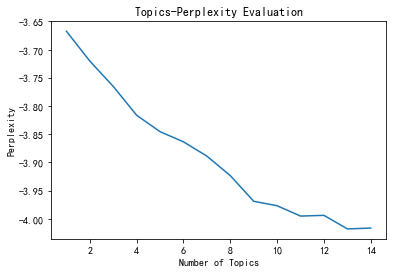

In [15]:
x = range(1,15)
y = [perplexity(i) for i in x]  

plt.plot(x, y)
plt.xlabel('Number of Topics')
plt.ylabel('Perplexity')
plt.rcParams['font.sans-serif']=['SimHei']
matplotlib.rcParams['axes.unicode_minus']=False
plt.title('Topics-Perplexity Evaluation')
plt.show()

In [16]:
#Compute coherence
def coherence(num_topics):
    ldamodel = LdaModel(corpus, num_topics=num_topics, id2word = dictionary, passes=20,random_state = 1)
    #print(ldamodel.print_topics(num_topics=num_topics, num_words=10))
    ldacm = CoherenceModel(model=ldamodel, texts=docs, dictionary=dictionary, coherence='c_v')
    #print(ldacm.get_coherence())
    return ldacm.get_coherence()

2022-09-30 14:36:44,821 : INFO : using symmetric alpha at 1.0
2022-09-30 14:36:44,821 : INFO : using symmetric eta at 1.0
2022-09-30 14:36:44,821 : INFO : using serial LDA version on this node
2022-09-30 14:36:44,821 : INFO : running online (multi-pass) LDA training, 1 topics, 20 passes over the supplied corpus of 83 documents, updating model once every 83 documents, evaluating perplexity every 83 documents, iterating 50x with a convergence threshold of 0.001000
2022-09-30 14:36:44,838 : INFO : -4.066 per-word bound, 16.7 perplexity estimate based on a held-out corpus of 83 documents with 1193 words
2022-09-30 14:36:44,838 : INFO : PROGRESS: pass 0, at document #83/83
2022-09-30 14:36:44,847 : INFO : topic #0 (1.000): 0.091*"nike" + 0.077*"order" + 0.047*"customer" + 0.041*"service" + 0.038*"shoe" + 0.037*"time" + 0.030*"customer_service" + 0.028*"get" + 0.026*"even" + 0.025*"never"
2022-09-30 14:36:44,847 : INFO : topic diff=0.373165, rho=1.000000
2022-09-30 14:36:44,856 : INFO : -3.6

2022-09-30 14:36:45,137 : INFO : topic diff=0.000000, rho=0.242536
2022-09-30 14:36:45,139 : INFO : -3.667 per-word bound, 12.7 perplexity estimate based on a held-out corpus of 83 documents with 1193 words
2022-09-30 14:36:45,139 : INFO : PROGRESS: pass 16, at document #83/83
2022-09-30 14:36:45,139 : INFO : topic #0 (1.000): 0.091*"nike" + 0.077*"order" + 0.047*"customer" + 0.041*"service" + 0.038*"shoe" + 0.037*"time" + 0.030*"customer_service" + 0.028*"get" + 0.026*"even" + 0.025*"online"
2022-09-30 14:36:45,152 : INFO : topic diff=0.000000, rho=0.235702
2022-09-30 14:36:45,154 : INFO : -3.667 per-word bound, 12.7 perplexity estimate based on a held-out corpus of 83 documents with 1193 words
2022-09-30 14:36:45,154 : INFO : PROGRESS: pass 17, at document #83/83
2022-09-30 14:36:45,168 : INFO : topic #0 (1.000): 0.091*"nike" + 0.077*"order" + 0.047*"customer" + 0.041*"service" + 0.038*"shoe" + 0.037*"time" + 0.030*"customer_service" + 0.028*"get" + 0.026*"even" + 0.025*"online"
2022

2022-09-30 14:36:47,161 : INFO : PROGRESS: pass 7, at document #83/83
2022-09-30 14:36:47,177 : INFO : topic #0 (0.500): 0.069*"nike" + 0.069*"never" + 0.057*"would" + 0.049*"product" + 0.048*"order" + 0.042*"return" + 0.039*"one" + 0.037*"company" + 0.037*"money" + 0.033*"back"
2022-09-30 14:36:47,177 : INFO : topic #1 (0.500): 0.101*"nike" + 0.090*"order" + 0.059*"customer" + 0.055*"service" + 0.046*"shoe" + 0.044*"time" + 0.042*"customer_service" + 0.031*"email" + 0.031*"online" + 0.029*"refund"
2022-09-30 14:36:47,177 : INFO : topic diff=0.036434, rho=0.333333
2022-09-30 14:36:47,209 : INFO : -3.734 per-word bound, 13.3 perplexity estimate based on a held-out corpus of 83 documents with 1193 words
2022-09-30 14:36:47,209 : INFO : PROGRESS: pass 8, at document #83/83
2022-09-30 14:36:47,224 : INFO : topic #0 (0.500): 0.071*"nike" + 0.070*"never" + 0.058*"would" + 0.050*"product" + 0.048*"order" + 0.043*"return" + 0.039*"one" + 0.038*"company" + 0.037*"money" + 0.034*"back"
2022-09-3

2022-09-30 14:36:47,585 : INFO : topic diff=0.016376, rho=0.223607
2022-09-30 14:36:47,601 : INFO : -3.722 per-word bound, 13.2 perplexity estimate based on a held-out corpus of 83 documents with 1193 words
2022-09-30 14:36:47,601 : INFO : PROGRESS: pass 19, at document #83/83
2022-09-30 14:36:47,619 : INFO : topic #0 (0.500): 0.078*"nike" + 0.074*"never" + 0.063*"would" + 0.052*"order" + 0.051*"product" + 0.048*"return" + 0.042*"money" + 0.040*"company" + 0.039*"one" + 0.036*"cant"
2022-09-30 14:36:47,619 : INFO : topic #1 (0.500): 0.096*"nike" + 0.088*"order" + 0.060*"customer" + 0.058*"service" + 0.052*"shoe" + 0.043*"customer_service" + 0.041*"time" + 0.035*"online" + 0.032*"email" + 0.031*"get"
2022-09-30 14:36:47,632 : INFO : topic diff=0.015415, rho=0.218218
2022-09-30 14:36:47,632 : INFO : LdaModel lifecycle event {'msg': 'trained LdaModel(num_terms=44, num_topics=2, decay=0.5, chunksize=2000) in 0.85s', 'datetime': '2022-09-30T14:36:47.632666', 'gensim': '4.1.2', 'python': '3.

2022-09-30 14:36:49,553 : INFO : topic diff=0.066278, rho=0.353553
2022-09-30 14:36:49,585 : INFO : -3.783 per-word bound, 13.8 perplexity estimate based on a held-out corpus of 83 documents with 1193 words
2022-09-30 14:36:49,585 : INFO : PROGRESS: pass 7, at document #83/83
2022-09-30 14:36:49,600 : INFO : topic #0 (0.333): 0.091*"would" + 0.091*"never" + 0.082*"product" + 0.077*"nike" + 0.052*"money" + 0.042*"back" + 0.035*"order" + 0.035*"time" + 0.033*"worst" + 0.032*"one"
2022-09-30 14:36:49,600 : INFO : topic #1 (0.333): 0.104*"nike" + 0.065*"time" + 0.063*"got" + 0.061*"refund" + 0.047*"waiting" + 0.042*"get" + 0.039*"customer" + 0.039*"week" + 0.035*"order" + 0.035*"still"
2022-09-30 14:36:49,600 : INFO : topic #2 (0.333): 0.109*"order" + 0.089*"nike" + 0.060*"service" + 0.059*"customer" + 0.052*"shoe" + 0.046*"customer_service" + 0.036*"online" + 0.031*"even" + 0.029*"dont" + 0.027*"email"
2022-09-30 14:36:49,600 : INFO : topic diff=0.059552, rho=0.333333
2022-09-30 14:36:49,

2022-09-30 14:36:49,930 : INFO : topic diff=0.030755, rho=0.242536
2022-09-30 14:36:49,962 : INFO : -3.764 per-word bound, 13.6 perplexity estimate based on a held-out corpus of 83 documents with 1193 words
2022-09-30 14:36:49,962 : INFO : PROGRESS: pass 16, at document #83/83
2022-09-30 14:36:49,977 : INFO : topic #0 (0.333): 0.099*"would" + 0.094*"never" + 0.082*"product" + 0.077*"nike" + 0.057*"money" + 0.042*"time" + 0.040*"back" + 0.036*"worst" + 0.033*"order" + 0.032*"one"
2022-09-30 14:36:49,977 : INFO : topic #1 (0.333): 0.089*"nike" + 0.072*"got" + 0.068*"refund" + 0.065*"time" + 0.060*"get" + 0.054*"waiting" + 0.049*"shoe" + 0.045*"still" + 0.040*"bought" + 0.039*"week"
2022-09-30 14:36:49,977 : INFO : topic #2 (0.333): 0.113*"order" + 0.096*"nike" + 0.065*"service" + 0.063*"customer" + 0.050*"customer_service" + 0.046*"shoe" + 0.035*"online" + 0.032*"even" + 0.028*"dont" + 0.027*"email"
2022-09-30 14:36:49,977 : INFO : topic diff=0.028495, rho=0.235702
2022-09-30 14:36:49,99

2022-09-30 14:36:51,888 : INFO : -3.856 per-word bound, 14.5 perplexity estimate based on a held-out corpus of 83 documents with 1193 words
2022-09-30 14:36:51,888 : INFO : PROGRESS: pass 3, at document #83/83
2022-09-30 14:36:51,919 : INFO : topic #0 (0.250): 0.104*"would" + 0.102*"never" + 0.092*"nike" + 0.086*"product" + 0.043*"back" + 0.040*"order" + 0.036*"get" + 0.036*"told" + 0.036*"money" + 0.026*"company"
2022-09-30 14:36:51,919 : INFO : topic #1 (0.250): 0.088*"time" + 0.086*"nike" + 0.064*"refund" + 0.056*"got" + 0.055*"waiting" + 0.053*"order" + 0.041*"week" + 0.040*"get" + 0.039*"month" + 0.035*"still"
2022-09-30 14:36:51,919 : INFO : topic #2 (0.250): 0.149*"order" + 0.062*"nike" + 0.044*"email" + 0.043*"time" + 0.036*"service" + 0.036*"stock" + 0.036*"customer" + 0.035*"dont" + 0.034*"ordered" + 0.032*"cancelled"
2022-09-30 14:36:51,919 : INFO : topic #3 (0.250): 0.119*"nike" + 0.075*"customer" + 0.072*"service" + 0.068*"shoe" + 0.063*"customer_service" + 0.039*"one" + 0

2022-09-30 14:36:52,218 : INFO : topic #1 (0.250): 0.094*"time" + 0.083*"refund" + 0.080*"nike" + 0.070*"got" + 0.069*"waiting" + 0.048*"month" + 0.048*"order" + 0.044*"get" + 0.043*"week" + 0.041*"still"
2022-09-30 14:36:52,218 : INFO : topic #2 (0.250): 0.168*"order" + 0.072*"nike" + 0.049*"email" + 0.043*"time" + 0.042*"ordered" + 0.038*"dont" + 0.037*"stock" + 0.036*"cancelled" + 0.032*"service" + 0.032*"call"
2022-09-30 14:36:52,218 : INFO : topic #3 (0.250): 0.110*"nike" + 0.088*"customer" + 0.081*"service" + 0.077*"shoe" + 0.074*"customer_service" + 0.035*"online" + 0.034*"one" + 0.034*"even" + 0.030*"get" + 0.028*"order"
2022-09-30 14:36:52,218 : INFO : topic diff=0.057108, rho=0.288675
2022-09-30 14:36:52,234 : INFO : -3.803 per-word bound, 14.0 perplexity estimate based on a held-out corpus of 83 documents with 1193 words
2022-09-30 14:36:52,234 : INFO : PROGRESS: pass 11, at document #83/83
2022-09-30 14:36:52,249 : INFO : topic #0 (0.250): 0.107*"never" + 0.099*"product" + 

2022-09-30 14:36:52,501 : INFO : topic #3 (0.250): 0.109*"nike" + 0.093*"customer" + 0.085*"service" + 0.079*"shoe" + 0.078*"customer_service" + 0.036*"online" + 0.034*"even" + 0.031*"get" + 0.030*"one" + 0.028*"item"
2022-09-30 14:36:52,501 : INFO : topic diff=0.026963, rho=0.229416
2022-09-30 14:36:52,517 : INFO : -3.794 per-word bound, 13.9 perplexity estimate based on a held-out corpus of 83 documents with 1193 words
2022-09-30 14:36:52,517 : INFO : PROGRESS: pass 18, at document #83/83
2022-09-30 14:36:52,533 : INFO : topic #0 (0.250): 0.109*"never" + 0.099*"product" + 0.095*"would" + 0.090*"nike" + 0.052*"money" + 0.048*"back" + 0.035*"told" + 0.034*"return" + 0.032*"one" + 0.031*"worst"
2022-09-30 14:36:52,533 : INFO : topic #1 (0.250): 0.095*"time" + 0.088*"refund" + 0.077*"nike" + 0.075*"got" + 0.072*"waiting" + 0.052*"order" + 0.050*"month" + 0.044*"get" + 0.043*"still" + 0.042*"week"
2022-09-30 14:36:52,533 : INFO : topic #2 (0.250): 0.175*"order" + 0.078*"nike" + 0.051*"ema

2022-09-30 14:36:54,634 : INFO : topic #2 (0.200): 0.141*"order" + 0.054*"nike" + 0.045*"customer" + 0.044*"time" + 0.041*"service" + 0.039*"email" + 0.034*"stock" + 0.033*"dont" + 0.033*"ordered" + 0.032*"company"
2022-09-30 14:36:54,634 : INFO : topic #3 (0.200): 0.127*"nike" + 0.074*"service" + 0.073*"customer" + 0.060*"customer_service" + 0.053*"shoe" + 0.047*"one" + 0.041*"online" + 0.038*"order" + 0.035*"even" + 0.031*"sent"
2022-09-30 14:36:54,635 : INFO : topic #4 (0.200): 0.128*"refund" + 0.117*"nike" + 0.105*"time" + 0.074*"order" + 0.071*"waiting" + 0.043*"online" + 0.037*"day" + 0.034*"month" + 0.034*"buy" + 0.033*"still"
2022-09-30 14:36:54,635 : INFO : topic diff=0.185956, rho=0.447214
2022-09-30 14:36:54,657 : INFO : -3.894 per-word bound, 14.9 perplexity estimate based on a held-out corpus of 83 documents with 1193 words
2022-09-30 14:36:54,657 : INFO : PROGRESS: pass 4, at document #83/83
2022-09-30 14:36:54,676 : INFO : topic #0 (0.200): 0.134*"would" + 0.110*"never" 

2022-09-30 14:36:54,867 : INFO : topic #4 (0.200): 0.170*"refund" + 0.135*"nike" + 0.109*"time" + 0.082*"waiting" + 0.069*"order" + 0.046*"online" + 0.043*"still" + 0.041*"day" + 0.033*"month" + 0.032*"week"
2022-09-30 14:36:54,867 : INFO : topic diff=0.078745, rho=0.301511
2022-09-30 14:36:54,898 : INFO : -3.854 per-word bound, 14.5 perplexity estimate based on a held-out corpus of 83 documents with 1193 words
2022-09-30 14:36:54,901 : INFO : PROGRESS: pass 10, at document #83/83
2022-09-30 14:36:54,914 : INFO : topic #0 (0.200): 0.130*"would" + 0.128*"product" + 0.116*"never" + 0.108*"nike" + 0.049*"back" + 0.047*"told" + 0.043*"worst" + 0.038*"order" + 0.030*"call" + 0.029*"buy"
2022-09-30 14:36:54,914 : INFO : topic #1 (0.200): 0.139*"get" + 0.090*"shoe" + 0.089*"got" + 0.074*"nike" + 0.044*"come" + 0.040*"bought" + 0.039*"customer" + 0.036*"week" + 0.036*"email" + 0.034*"call"
2022-09-30 14:36:54,914 : INFO : topic #2 (0.200): 0.154*"order" + 0.058*"nike" + 0.049*"time" + 0.042*"e

2022-09-30 14:36:55,118 : INFO : -3.842 per-word bound, 14.3 perplexity estimate based on a held-out corpus of 83 documents with 1193 words
2022-09-30 14:36:55,118 : INFO : PROGRESS: pass 16, at document #83/83
2022-09-30 14:36:55,134 : INFO : topic #0 (0.200): 0.131*"product" + 0.127*"would" + 0.117*"never" + 0.111*"nike" + 0.050*"told" + 0.050*"back" + 0.044*"worst" + 0.037*"order" + 0.031*"buy" + 0.030*"call"
2022-09-30 14:36:55,134 : INFO : topic #1 (0.200): 0.152*"get" + 0.108*"shoe" + 0.095*"got" + 0.074*"nike" + 0.049*"come" + 0.044*"bought" + 0.034*"email" + 0.034*"customer" + 0.033*"week" + 0.032*"call"
2022-09-30 14:36:55,134 : INFO : topic #2 (0.200): 0.156*"order" + 0.060*"nike" + 0.050*"time" + 0.044*"email" + 0.043*"ordered" + 0.038*"even" + 0.037*"company" + 0.036*"money" + 0.035*"stock" + 0.035*"service"
2022-09-30 14:36:55,134 : INFO : topic #3 (0.200): 0.106*"nike" + 0.097*"customer" + 0.087*"service" + 0.079*"customer_service" + 0.051*"shoe" + 0.048*"one" + 0.044*"on

2022-09-30 14:36:56,895 : INFO : topic #4 (0.167): 0.115*"nike" + 0.093*"time" + 0.090*"refund" + 0.064*"order" + 0.056*"waiting" + 0.049*"dont" + 0.049*"shoe" + 0.037*"still" + 0.036*"online" + 0.033*"month"
2022-09-30 14:36:56,895 : INFO : topic #3 (0.167): 0.138*"nike" + 0.086*"service" + 0.081*"shoe" + 0.081*"customer" + 0.070*"customer_service" + 0.042*"one" + 0.039*"order" + 0.030*"day" + 0.028*"even" + 0.025*"ordered"
2022-09-30 14:36:56,895 : INFO : topic #5 (0.167): 0.102*"order" + 0.087*"nike" + 0.059*"time" + 0.040*"online" + 0.039*"even" + 0.039*"customer" + 0.033*"got" + 0.032*"email" + 0.032*"money" + 0.030*"item"
2022-09-30 14:36:56,895 : INFO : topic #1 (0.167): 0.119*"get" + 0.082*"nike" + 0.055*"order" + 0.054*"shoe" + 0.046*"service" + 0.045*"still" + 0.043*"email" + 0.040*"customer" + 0.039*"waiting" + 0.034*"never"
2022-09-30 14:36:56,895 : INFO : topic diff=0.293881, rho=0.577350
2022-09-30 14:36:56,926 : INFO : -3.991 per-word bound, 15.9 perplexity estimate base

2022-09-30 14:36:57,163 : INFO : topic #4 (0.167): 0.138*"refund" + 0.132*"nike" + 0.110*"time" + 0.069*"waiting" + 0.060*"buy" + 0.055*"dont" + 0.049*"shoe" + 0.047*"order" + 0.041*"still" + 0.038*"day"
2022-09-30 14:36:57,163 : INFO : topic #1 (0.167): 0.175*"get" + 0.088*"nike" + 0.071*"money" + 0.063*"shoe" + 0.055*"email" + 0.054*"got" + 0.050*"waiting" + 0.049*"say" + 0.047*"still" + 0.036*"order"
2022-09-30 14:36:57,163 : INFO : topic #5 (0.167): 0.109*"order" + 0.084*"nike" + 0.060*"online" + 0.057*"time" + 0.043*"even" + 0.039*"got" + 0.033*"week" + 0.031*"ordered" + 0.031*"email" + 0.030*"item"
2022-09-30 14:36:57,163 : INFO : topic diff=0.128217, rho=0.333333
2022-09-30 14:36:57,183 : INFO : -3.899 per-word bound, 14.9 perplexity estimate based on a held-out corpus of 83 documents with 1193 words
2022-09-30 14:36:57,183 : INFO : PROGRESS: pass 8, at document #83/83
2022-09-30 14:36:57,199 : INFO : topic #5 (0.167): 0.112*"order" + 0.084*"nike" + 0.061*"online" + 0.057*"time"

2022-09-30 14:36:57,400 : INFO : topic #4 (0.167): 0.142*"refund" + 0.131*"nike" + 0.109*"time" + 0.068*"waiting" + 0.067*"buy" + 0.059*"dont" + 0.050*"order" + 0.050*"shoe" + 0.042*"still" + 0.040*"day"
2022-09-30 14:36:57,400 : INFO : topic diff=0.062632, rho=0.258199
2022-09-30 14:36:57,416 : INFO : -3.877 per-word bound, 14.7 perplexity estimate based on a held-out corpus of 83 documents with 1193 words
2022-09-30 14:36:57,416 : INFO : PROGRESS: pass 14, at document #83/83
2022-09-30 14:36:57,433 : INFO : topic #1 (0.167): 0.206*"get" + 0.085*"nike" + 0.078*"money" + 0.069*"shoe" + 0.069*"got" + 0.063*"email" + 0.059*"say" + 0.055*"waiting" + 0.047*"still" + 0.033*"order"
2022-09-30 14:36:57,433 : INFO : topic #5 (0.167): 0.115*"order" + 0.087*"nike" + 0.063*"online" + 0.055*"time" + 0.045*"even" + 0.036*"got" + 0.034*"cant" + 0.033*"week" + 0.032*"dont" + 0.030*"email"
2022-09-30 14:36:57,433 : INFO : topic #4 (0.167): 0.141*"refund" + 0.131*"nike" + 0.109*"time" + 0.068*"waiting"

2022-09-30 14:36:57,622 : INFO : LdaModel lifecycle event {'msg': 'trained LdaModel(num_terms=44, num_topics=6, decay=0.5, chunksize=2000) in 0.84s', 'datetime': '2022-09-30T14:36:57.622541', 'gensim': '4.1.2', 'python': '3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22621-SP0', 'event': 'created'}
2022-09-30 14:36:57,622 : INFO : using ParallelWordOccurrenceAccumulator(processes=7, batch_size=64) to estimate probabilities from sliding windows
2022-09-30 14:36:59,184 : INFO : 7 accumulators retrieved from output queue
2022-09-30 14:36:59,208 : INFO : accumulated word occurrence stats for 399 virtual documents
2022-09-30 14:36:59,331 : INFO : using symmetric alpha at 0.14285714285714285
2022-09-30 14:36:59,331 : INFO : using symmetric eta at 0.14285714285714285
2022-09-30 14:36:59,332 : INFO : using serial LDA version on this node
2022-09-30 14:36:59,333 : INFO : running online (multi-pass) LDA training, 7 topics, 20 passes over the su

2022-09-30 14:36:59,640 : INFO : topic #0 (0.143): 0.132*"never" + 0.106*"would" + 0.097*"nike" + 0.092*"product" + 0.045*"back" + 0.041*"company" + 0.039*"order" + 0.034*"return" + 0.032*"told" + 0.027*"said"
2022-09-30 14:36:59,641 : INFO : topic #6 (0.143): 0.145*"order" + 0.098*"call" + 0.090*"time" + 0.076*"email" + 0.054*"customer" + 0.053*"worst" + 0.049*"told" + 0.044*"day" + 0.037*"nike" + 0.037*"would"
2022-09-30 14:36:59,641 : INFO : topic #5 (0.143): 0.100*"order" + 0.085*"nike" + 0.052*"online" + 0.048*"time" + 0.042*"customer" + 0.038*"even" + 0.038*"got" + 0.037*"item" + 0.031*"cant" + 0.030*"back"
2022-09-30 14:36:59,642 : INFO : topic #3 (0.143): 0.120*"nike" + 0.118*"service" + 0.118*"customer" + 0.106*"customer_service" + 0.098*"shoe" + 0.036*"even" + 0.032*"get" + 0.030*"one" + 0.027*"pair" + 0.023*"know"
2022-09-30 14:36:59,642 : INFO : topic diff=0.175130, rho=0.377964
2022-09-30 14:36:59,666 : INFO : -3.926 per-word bound, 15.2 perplexity estimate based on a held

2022-09-30 14:36:59,899 : INFO : topic #0 (0.143): 0.131*"never" + 0.115*"would" + 0.104*"nike" + 0.093*"product" + 0.050*"company" + 0.044*"back" + 0.036*"return" + 0.034*"order" + 0.031*"know" + 0.029*"buy"
2022-09-30 14:36:59,899 : INFO : topic #2 (0.143): 0.114*"order" + 0.088*"shoe" + 0.084*"nike" + 0.077*"cancelled" + 0.066*"ordered" + 0.058*"stock" + 0.052*"company" + 0.052*"service" + 0.050*"online" + 0.041*"dont"
2022-09-30 14:36:59,899 : INFO : topic diff=0.095796, rho=0.277350
2022-09-30 14:36:59,915 : INFO : -3.883 per-word bound, 14.8 perplexity estimate based on a held-out corpus of 83 documents with 1193 words
2022-09-30 14:36:59,931 : INFO : PROGRESS: pass 12, at document #83/83
2022-09-30 14:36:59,931 : INFO : topic #1 (0.143): 0.235*"get" + 0.097*"money" + 0.089*"nike" + 0.083*"say" + 0.073*"shoe" + 0.068*"still" + 0.051*"email" + 0.042*"pair" + 0.042*"call" + 0.037*"got"
2022-09-30 14:36:59,931 : INFO : topic #2 (0.143): 0.115*"order" + 0.090*"shoe" + 0.084*"nike" + 

2022-09-30 14:37:00,147 : INFO : topic diff=0.055527, rho=0.229416
2022-09-30 14:37:00,151 : INFO : -3.868 per-word bound, 14.6 perplexity estimate based on a held-out corpus of 83 documents with 1193 words
2022-09-30 14:37:00,166 : INFO : PROGRESS: pass 18, at document #83/83
2022-09-30 14:37:00,168 : INFO : topic #2 (0.143): 0.118*"order" + 0.096*"shoe" + 0.083*"cancelled" + 0.082*"nike" + 0.070*"ordered" + 0.061*"stock" + 0.056*"company" + 0.056*"service" + 0.052*"online" + 0.039*"dont"
2022-09-30 14:37:00,168 : INFO : topic #6 (0.143): 0.157*"order" + 0.112*"time" + 0.088*"email" + 0.070*"call" + 0.070*"worst" + 0.060*"customer" + 0.054*"told" + 0.044*"day" + 0.037*"money" + 0.034*"even"
2022-09-30 14:37:00,182 : INFO : topic #5 (0.143): 0.095*"nike" + 0.093*"order" + 0.057*"online" + 0.046*"cant" + 0.043*"got" + 0.039*"item" + 0.039*"customer" + 0.037*"anything" + 0.036*"even" + 0.036*"time"
2022-09-30 14:37:00,183 : INFO : topic #1 (0.143): 0.244*"get" + 0.105*"money" + 0.092*"sa

2022-09-30 14:37:01,972 : INFO : topic #1 (0.125): 0.135*"got" + 0.078*"refund" + 0.065*"nike" + 0.064*"still" + 0.062*"get" + 0.060*"order" + 0.052*"bought" + 0.050*"waiting" + 0.043*"day" + 0.037*"customer"
2022-09-30 14:37:01,972 : INFO : topic #2 (0.125): 0.079*"order" + 0.069*"nike" + 0.066*"service" + 0.053*"stock" + 0.051*"customer" + 0.049*"shoe" + 0.049*"cancelled" + 0.040*"dont" + 0.038*"get" + 0.037*"online"
2022-09-30 14:37:01,972 : INFO : topic #6 (0.125): 0.146*"order" + 0.106*"time" + 0.086*"call" + 0.078*"email" + 0.062*"customer" + 0.053*"told" + 0.045*"service" + 0.038*"day" + 0.038*"still" + 0.037*"customer_service"
2022-09-30 14:37:01,972 : INFO : topic #0 (0.125): 0.112*"never" + 0.104*"would" + 0.090*"product" + 0.063*"nike" + 0.048*"get" + 0.047*"back" + 0.042*"company" + 0.037*"worst" + 0.036*"told" + 0.035*"order"
2022-09-30 14:37:01,972 : INFO : topic diff=0.281511, rho=0.447214
2022-09-30 14:37:01,988 : INFO : -4.004 per-word bound, 16.0 perplexity estimate b

2022-09-30 14:37:02,193 : INFO : topic #6 (0.125): 0.170*"order" + 0.114*"time" + 0.094*"email" + 0.078*"call" + 0.073*"customer" + 0.056*"told" + 0.044*"service" + 0.042*"customer_service" + 0.037*"day" + 0.031*"still"
2022-09-30 14:37:02,193 : INFO : topic #7 (0.125): 0.167*"nike" + 0.144*"order" + 0.082*"shoe" + 0.050*"dont" + 0.046*"buy" + 0.044*"cant" + 0.041*"get" + 0.036*"time" + 0.036*"day" + 0.036*"anything"
2022-09-30 14:37:02,193 : INFO : topic diff=0.132009, rho=0.301511
2022-09-30 14:37:02,224 : INFO : -3.936 per-word bound, 15.3 perplexity estimate based on a held-out corpus of 83 documents with 1193 words
2022-09-30 14:37:02,226 : INFO : PROGRESS: pass 10, at document #83/83
2022-09-30 14:37:02,240 : INFO : topic #7 (0.125): 0.168*"nike" + 0.147*"order" + 0.081*"shoe" + 0.050*"dont" + 0.047*"buy" + 0.046*"cant" + 0.041*"get" + 0.037*"day" + 0.036*"anything" + 0.036*"time"
2022-09-30 14:37:02,240 : INFO : topic #1 (0.125): 0.166*"got" + 0.098*"get" + 0.085*"refund" + 0.08

2022-09-30 14:37:02,413 : INFO : topic diff=0.070982, rho=0.242536
2022-09-30 14:37:02,429 : INFO : -3.910 per-word bound, 15.0 perplexity estimate based on a held-out corpus of 83 documents with 1193 words
2022-09-30 14:37:02,429 : INFO : PROGRESS: pass 16, at document #83/83
2022-09-30 14:37:02,445 : INFO : topic #0 (0.125): 0.131*"never" + 0.121*"would" + 0.120*"product" + 0.067*"nike" + 0.065*"worst" + 0.059*"money" + 0.047*"company" + 0.043*"back" + 0.033*"call" + 0.033*"said"
2022-09-30 14:37:02,445 : INFO : topic #4 (0.125): 0.135*"refund" + 0.120*"waiting" + 0.117*"time" + 0.101*"month" + 0.096*"nike" + 0.063*"shoe" + 0.044*"bought" + 0.035*"pair" + 0.033*"online" + 0.032*"come"
2022-09-30 14:37:02,445 : INFO : topic #6 (0.125): 0.193*"order" + 0.126*"time" + 0.087*"email" + 0.087*"customer" + 0.064*"told" + 0.063*"call" + 0.053*"customer_service" + 0.050*"service" + 0.034*"day" + 0.029*"stock"
2022-09-30 14:37:02,445 : INFO : topic #5 (0.125): 0.088*"online" + 0.081*"nike" + 0

2022-09-30 14:37:04,461 : INFO : topic #1 (0.111): 0.104*"nike" + 0.098*"got" + 0.081*"get" + 0.070*"customer" + 0.055*"service" + 0.055*"customer_service" + 0.055*"order" + 0.044*"refund" + 0.040*"bought" + 0.039*"still"
2022-09-30 14:37:04,461 : INFO : topic #5 (0.111): 0.081*"nike" + 0.080*"order" + 0.053*"time" + 0.046*"even" + 0.045*"online" + 0.042*"item" + 0.038*"money" + 0.037*"email" + 0.033*"customer" + 0.032*"week"
2022-09-30 14:37:04,462 : INFO : topic #0 (0.111): 0.105*"never" + 0.090*"would" + 0.058*"nike" + 0.057*"product" + 0.045*"back" + 0.045*"order" + 0.040*"company" + 0.037*"told" + 0.036*"get" + 0.032*"customer"
2022-09-30 14:37:04,462 : INFO : topic #7 (0.111): 0.151*"nike" + 0.109*"order" + 0.070*"shoe" + 0.048*"buy" + 0.037*"dont" + 0.037*"time" + 0.034*"product" + 0.034*"even" + 0.033*"day" + 0.030*"cant"
2022-09-30 14:37:04,463 : INFO : topic diff=0.398571, rho=0.577350
2022-09-30 14:37:04,486 : INFO : -4.106 per-word bound, 17.2 perplexity estimate based on a

2022-09-30 14:37:04,706 : INFO : topic #1 (0.111): 0.201*"got" + 0.110*"get" + 0.089*"order" + 0.060*"bought" + 0.056*"customer" + 0.054*"nike" + 0.038*"waiting" + 0.031*"email" + 0.031*"service" + 0.030*"still"
2022-09-30 14:37:04,708 : INFO : topic #6 (0.111): 0.161*"order" + 0.105*"time" + 0.087*"email" + 0.074*"customer" + 0.071*"call" + 0.057*"told" + 0.049*"service" + 0.042*"customer_service" + 0.035*"day" + 0.034*"worst"
2022-09-30 14:37:04,709 : INFO : topic diff=0.169924, rho=0.333333
2022-09-30 14:37:04,727 : INFO : -3.963 per-word bound, 15.6 perplexity estimate based on a held-out corpus of 83 documents with 1193 words
2022-09-30 14:37:04,728 : INFO : PROGRESS: pass 8, at document #83/83
2022-09-30 14:37:04,742 : INFO : topic #1 (0.111): 0.205*"got" + 0.111*"get" + 0.091*"order" + 0.060*"bought" + 0.055*"customer" + 0.052*"nike" + 0.041*"waiting" + 0.033*"email" + 0.031*"still" + 0.030*"service"
2022-09-30 14:37:04,743 : INFO : topic #5 (0.111): 0.079*"nike" + 0.071*"online

2022-09-30 14:37:04,929 : INFO : topic diff=0.071999, rho=0.258199
2022-09-30 14:37:04,947 : INFO : -3.939 per-word bound, 15.3 perplexity estimate based on a held-out corpus of 83 documents with 1193 words
2022-09-30 14:37:04,960 : INFO : PROGRESS: pass 14, at document #83/83
2022-09-30 14:37:04,977 : INFO : topic #2 (0.111): 0.143*"order" + 0.076*"cancelled" + 0.073*"nike" + 0.065*"ordered" + 0.063*"stock" + 0.062*"shoe" + 0.060*"service" + 0.057*"online" + 0.057*"company" + 0.042*"dont"
2022-09-30 14:37:04,977 : INFO : topic #7 (0.111): 0.155*"nike" + 0.146*"order" + 0.060*"cant" + 0.058*"buy" + 0.057*"dont" + 0.046*"time" + 0.042*"even" + 0.039*"product" + 0.039*"anything" + 0.036*"one"
2022-09-30 14:37:04,977 : INFO : topic #6 (0.111): 0.172*"order" + 0.107*"email" + 0.105*"time" + 0.076*"customer" + 0.068*"call" + 0.056*"told" + 0.051*"service" + 0.043*"customer_service" + 0.042*"worst" + 0.035*"stock"
2022-09-30 14:37:04,979 : INFO : topic #3 (0.111): 0.163*"customer" + 0.156*"s

2022-09-30 14:37:05,170 : INFO : using ParallelWordOccurrenceAccumulator(processes=7, batch_size=64) to estimate probabilities from sliding windows
2022-09-30 14:37:06,636 : INFO : 7 accumulators retrieved from output queue
2022-09-30 14:37:06,636 : INFO : accumulated word occurrence stats for 399 virtual documents
2022-09-30 14:37:06,810 : INFO : using symmetric alpha at 0.1
2022-09-30 14:37:06,810 : INFO : using symmetric eta at 0.1
2022-09-30 14:37:06,810 : INFO : using serial LDA version on this node
2022-09-30 14:37:06,810 : INFO : running online (multi-pass) LDA training, 10 topics, 20 passes over the supplied corpus of 83 documents, updating model once every 83 documents, evaluating perplexity every 83 documents, iterating 50x with a convergence threshold of 0.001000
2022-09-30 14:37:06,826 : INFO : -4.981 per-word bound, 31.6 perplexity estimate based on a held-out corpus of 83 documents with 1193 words
2022-09-30 14:37:06,826 : INFO : PROGRESS: pass 0, at document #83/83
2022-

2022-09-30 14:37:07,078 : INFO : topic #0 (0.100): 0.118*"never" + 0.117*"would" + 0.104*"product" + 0.085*"nike" + 0.049*"back" + 0.048*"worst" + 0.045*"told" + 0.043*"company" + 0.039*"order" + 0.036*"call"
2022-09-30 14:37:07,078 : INFO : topic #5 (0.100): 0.104*"order" + 0.084*"nike" + 0.062*"time" + 0.050*"even" + 0.048*"online" + 0.047*"money" + 0.046*"return" + 0.044*"item" + 0.041*"sent" + 0.037*"one"
2022-09-30 14:37:07,082 : INFO : topic diff=0.223292, rho=0.377964
2022-09-30 14:37:07,094 : INFO : -4.056 per-word bound, 16.6 perplexity estimate based on a held-out corpus of 83 documents with 1193 words
2022-09-30 14:37:07,094 : INFO : PROGRESS: pass 6, at document #83/83
2022-09-30 14:37:07,109 : INFO : topic #6 (0.100): 0.134*"order" + 0.101*"time" + 0.084*"customer" + 0.071*"call" + 0.068*"told" + 0.067*"day" + 0.063*"service" + 0.051*"customer_service" + 0.036*"email" + 0.036*"still"
2022-09-30 14:37:07,109 : INFO : topic #3 (0.100): 0.139*"customer" + 0.134*"service" + 0.

2022-09-30 14:37:07,303 : INFO : topic diff=0.132812, rho=0.277350
2022-09-30 14:37:07,318 : INFO : -3.998 per-word bound, 16.0 perplexity estimate based on a held-out corpus of 83 documents with 1193 words
2022-09-30 14:37:07,318 : INFO : PROGRESS: pass 12, at document #83/83
2022-09-30 14:37:07,334 : INFO : topic #4 (0.100): 0.215*"refund" + 0.114*"time" + 0.107*"waiting" + 0.076*"month" + 0.076*"nike" + 0.063*"bought" + 0.051*"order" + 0.051*"online" + 0.049*"still" + 0.040*"week"
2022-09-30 14:37:07,334 : INFO : topic #8 (0.100): 0.108*"say" + 0.096*"call" + 0.093*"email" + 0.064*"order" + 0.055*"get" + 0.049*"still" + 0.042*"ordered" + 0.042*"money" + 0.037*"service" + 0.035*"nike"
2022-09-30 14:37:07,334 : INFO : topic #9 (0.100): 0.205*"shoe" + 0.185*"get" + 0.099*"nike" + 0.076*"ordered" + 0.069*"come" + 0.041*"service" + 0.038*"email" + 0.037*"money" + 0.028*"got" + 0.024*"pair"
2022-09-30 14:37:07,334 : INFO : topic #3 (0.100): 0.144*"customer" + 0.138*"service" + 0.133*"cust

2022-09-30 14:37:07,555 : INFO : topic #1 (0.100): 0.229*"got" + 0.086*"week" + 0.077*"customer" + 0.072*"waiting" + 0.067*"bought" + 0.061*"said" + 0.058*"get" + 0.056*"nike" + 0.051*"still" + 0.050*"even"
2022-09-30 14:37:07,555 : INFO : topic #7 (0.100): 0.176*"order" + 0.161*"nike" + 0.072*"buy" + 0.053*"day" + 0.048*"even" + 0.048*"dont" + 0.047*"shoe" + 0.046*"cant" + 0.045*"time" + 0.044*"anything"
2022-09-30 14:37:07,555 : INFO : topic #3 (0.100): 0.144*"customer" + 0.137*"service" + 0.133*"customer_service" + 0.117*"nike" + 0.055*"shoe" + 0.039*"even" + 0.028*"one" + 0.026*"week" + 0.025*"sent" + 0.024*"pair"
2022-09-30 14:37:07,571 : INFO : topic #9 (0.100): 0.216*"shoe" + 0.200*"get" + 0.106*"nike" + 0.084*"come" + 0.077*"ordered" + 0.035*"email" + 0.032*"service" + 0.032*"money" + 0.024*"got" + 0.023*"call"
2022-09-30 14:37:07,572 : INFO : topic #2 (0.100): 0.107*"order" + 0.086*"online" + 0.081*"stock" + 0.077*"dont" + 0.077*"nike" + 0.075*"cancelled" + 0.068*"shoe" + 0.05

2022-09-30 14:37:09,476 : INFO : topic #1 (0.091): 0.116*"got" + 0.114*"order" + 0.077*"time" + 0.076*"customer" + 0.056*"customer_service" + 0.056*"service" + 0.052*"told" + 0.049*"item" + 0.042*"cancelled" + 0.041*"nike"
2022-09-30 14:37:09,477 : INFO : topic #7 (0.091): 0.138*"order" + 0.127*"nike" + 0.059*"shoe" + 0.052*"time" + 0.051*"even" + 0.038*"dont" + 0.036*"buy" + 0.035*"customer" + 0.029*"return" + 0.027*"cant"
2022-09-30 14:37:09,478 : INFO : topic #6 (0.091): 0.165*"order" + 0.076*"stock" + 0.073*"service" + 0.071*"call" + 0.065*"nike" + 0.060*"would" + 0.059*"email" + 0.053*"time" + 0.046*"customer" + 0.039*"cancelled"
2022-09-30 14:37:09,478 : INFO : topic diff=0.361010, rho=0.447214
2022-09-30 14:37:09,499 : INFO : -4.100 per-word bound, 17.2 perplexity estimate based on a held-out corpus of 83 documents with 1193 words
2022-09-30 14:37:09,500 : INFO : PROGRESS: pass 4, at document #83/83
2022-09-30 14:37:09,515 : INFO : topic #1 (0.091): 0.129*"got" + 0.121*"order" +

2022-09-30 14:37:09,701 : INFO : topic #7 (0.091): 0.188*"order" + 0.129*"nike" + 0.059*"time" + 0.057*"even" + 0.047*"dont" + 0.046*"buy" + 0.042*"shoe" + 0.039*"cant" + 0.039*"return" + 0.029*"day"
2022-09-30 14:37:09,701 : INFO : topic #1 (0.091): 0.159*"got" + 0.132*"order" + 0.100*"customer" + 0.088*"time" + 0.073*"service" + 0.057*"customer_service" + 0.056*"told" + 0.054*"item" + 0.051*"cancelled" + 0.042*"know"
2022-09-30 14:37:09,701 : INFO : topic diff=0.146885, rho=0.301511
2022-09-30 14:37:09,718 : INFO : -4.011 per-word bound, 16.1 perplexity estimate based on a held-out corpus of 83 documents with 1193 words
2022-09-30 14:37:09,718 : INFO : PROGRESS: pass 10, at document #83/83
2022-09-30 14:37:09,734 : INFO : topic #2 (0.091): 0.122*"never" + 0.082*"company" + 0.068*"customer" + 0.060*"product" + 0.055*"money" + 0.048*"return" + 0.048*"order" + 0.039*"service" + 0.038*"stock" + 0.036*"nike"
2022-09-30 14:37:09,734 : INFO : topic #1 (0.091): 0.161*"got" + 0.133*"order" + 

2022-09-30 14:37:09,952 : INFO : topic diff=0.072996, rho=0.242536
2022-09-30 14:37:09,979 : INFO : -3.989 per-word bound, 15.9 perplexity estimate based on a held-out corpus of 83 documents with 1193 words
2022-09-30 14:37:09,979 : INFO : PROGRESS: pass 16, at document #83/83
2022-09-30 14:37:10,002 : INFO : topic #5 (0.091): 0.107*"nike" + 0.059*"online" + 0.052*"sent" + 0.046*"one" + 0.045*"even" + 0.044*"time" + 0.039*"item" + 0.038*"ordered" + 0.036*"customer" + 0.036*"order"
2022-09-30 14:37:10,003 : INFO : topic #10 (0.091): 0.158*"refund" + 0.106*"waiting" + 0.085*"nike" + 0.075*"month" + 0.071*"time" + 0.069*"worst" + 0.054*"day" + 0.052*"call" + 0.050*"still" + 0.042*"week"
2022-09-30 14:37:10,004 : INFO : topic #1 (0.091): 0.152*"order" + 0.146*"got" + 0.109*"customer" + 0.084*"time" + 0.075*"service" + 0.073*"item" + 0.059*"customer_service" + 0.049*"told" + 0.047*"know" + 0.044*"cancelled"
2022-09-30 14:37:10,005 : INFO : topic #3 (0.091): 0.142*"customer" + 0.139*"service

2022-09-30 14:37:12,003 : INFO : topic #0 (0.083): 0.138*"never" + 0.066*"product" + 0.060*"money" + 0.056*"company" + 0.047*"return" + 0.042*"nike" + 0.042*"know" + 0.040*"come" + 0.039*"order" + 0.037*"get"
2022-09-30 14:37:12,003 : INFO : topic #6 (0.083): 0.143*"order" + 0.083*"time" + 0.077*"would" + 0.073*"email" + 0.069*"call" + 0.063*"told" + 0.047*"customer" + 0.041*"service" + 0.039*"stock" + 0.037*"still"
2022-09-30 14:37:12,003 : INFO : topic #5 (0.083): 0.104*"order" + 0.079*"nike" + 0.070*"online" + 0.048*"time" + 0.046*"item" + 0.038*"got" + 0.035*"even" + 0.034*"one" + 0.033*"back" + 0.032*"return"
2022-09-30 14:37:12,003 : INFO : topic #8 (0.083): 0.124*"nike" + 0.106*"refund" + 0.092*"would" + 0.074*"get" + 0.065*"waiting" + 0.058*"back" + 0.057*"time" + 0.054*"told" + 0.052*"still" + 0.052*"month"
2022-09-30 14:37:12,003 : INFO : topic diff=0.383062, rho=0.577350
2022-09-30 14:37:12,035 : INFO : -4.203 per-word bound, 18.4 perplexity estimate based on a held-out corp

2022-09-30 14:37:12,316 : INFO : topic #0 (0.083): 0.220*"never" + 0.088*"money" + 0.070*"company" + 0.065*"product" + 0.063*"return" + 0.061*"know" + 0.040*"sent" + 0.039*"customer" + 0.037*"even" + 0.036*"nike"
2022-09-30 14:37:12,316 : INFO : topic #7 (0.083): 0.172*"nike" + 0.164*"order" + 0.070*"day" + 0.061*"product" + 0.045*"even" + 0.043*"time" + 0.041*"ordered" + 0.037*"dont" + 0.036*"buy" + 0.033*"one"
2022-09-30 14:37:12,317 : INFO : topic #10 (0.083): 0.081*"call" + 0.076*"order" + 0.071*"day" + 0.057*"email" + 0.056*"nike" + 0.048*"money" + 0.047*"worst" + 0.045*"still" + 0.044*"cancelled" + 0.044*"get"
2022-09-30 14:37:12,318 : INFO : topic diff=0.184765, rho=0.333333
2022-09-30 14:37:12,338 : INFO : -4.074 per-word bound, 16.8 perplexity estimate based on a held-out corpus of 83 documents with 1193 words
2022-09-30 14:37:12,338 : INFO : PROGRESS: pass 8, at document #83/83
2022-09-30 14:37:12,354 : INFO : topic #3 (0.083): 0.151*"nike" + 0.138*"customer" + 0.133*"service

2022-09-30 14:37:12,586 : INFO : topic #5 (0.083): 0.121*"online" + 0.089*"order" + 0.073*"nike" + 0.057*"item" + 0.056*"one" + 0.049*"sent" + 0.049*"week" + 0.046*"return" + 0.040*"back" + 0.039*"time"
2022-09-30 14:37:12,586 : INFO : topic diff=0.112974, rho=0.258199
2022-09-30 14:37:12,603 : INFO : -4.030 per-word bound, 16.3 perplexity estimate based on a held-out corpus of 83 documents with 1193 words
2022-09-30 14:37:12,603 : INFO : PROGRESS: pass 14, at document #83/83
2022-09-30 14:37:12,618 : INFO : topic #4 (0.083): 0.164*"buy" + 0.156*"product" + 0.146*"nike" + 0.111*"time" + 0.110*"pair" + 0.056*"bought" + 0.048*"would" + 0.038*"shoe" + 0.032*"told" + 0.030*"week"
2022-09-30 14:37:12,618 : INFO : topic #11 (0.083): 0.220*"shoe" + 0.163*"pair" + 0.097*"return" + 0.069*"even" + 0.069*"customer" + 0.056*"worst" + 0.040*"customer_service" + 0.040*"service" + 0.039*"nike" + 0.036*"order"
2022-09-30 14:37:12,618 : INFO : topic #2 (0.083): 0.128*"order" + 0.087*"shoe" + 0.076*"sto

2022-09-30 14:37:12,815 : INFO : topic diff=0.074296, rho=0.218218
2022-09-30 14:37:12,816 : INFO : LdaModel lifecycle event {'msg': 'trained LdaModel(num_terms=44, num_topics=12, decay=0.5, chunksize=2000) in 0.94s', 'datetime': '2022-09-30T14:37:12.816831', 'gensim': '4.1.2', 'python': '3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22621-SP0', 'event': 'created'}
2022-09-30 14:37:12,818 : INFO : using ParallelWordOccurrenceAccumulator(processes=7, batch_size=64) to estimate probabilities from sliding windows
2022-09-30 14:37:14,302 : INFO : 7 accumulators retrieved from output queue
2022-09-30 14:37:14,318 : INFO : accumulated word occurrence stats for 399 virtual documents
2022-09-30 14:37:14,508 : INFO : using symmetric alpha at 0.07692307692307693
2022-09-30 14:37:14,508 : INFO : using symmetric eta at 0.07692307692307693
2022-09-30 14:37:14,508 : INFO : using serial LDA version on this node
2022-09-30 14:37:14,515 : INFO : runni

2022-09-30 14:37:14,770 : INFO : topic #12 (0.077): 0.198*"shoe" + 0.126*"nike" + 0.118*"online" + 0.085*"cancelled" + 0.063*"still" + 0.053*"time" + 0.048*"dont" + 0.040*"pair" + 0.040*"waiting" + 0.033*"call"
2022-09-30 14:37:14,770 : INFO : topic #1 (0.077): 0.099*"customer" + 0.081*"customer_service" + 0.079*"service" + 0.069*"get" + 0.068*"cant" + 0.066*"even" + 0.060*"time" + 0.060*"email" + 0.054*"nike" + 0.046*"week"
2022-09-30 14:37:14,781 : INFO : topic #4 (0.077): 0.138*"nike" + 0.135*"time" + 0.108*"shoe" + 0.101*"bought" + 0.093*"buy" + 0.073*"come" + 0.057*"product" + 0.056*"would" + 0.050*"pair" + 0.032*"refund"
2022-09-30 14:37:14,782 : INFO : topic #9 (0.077): 0.134*"order" + 0.129*"got" + 0.098*"day" + 0.090*"ordered" + 0.081*"nike" + 0.041*"get" + 0.036*"email" + 0.035*"shoe" + 0.035*"company" + 0.035*"bought"
2022-09-30 14:37:14,782 : INFO : topic diff=0.307174, rho=0.377964
2022-09-30 14:37:14,802 : INFO : -4.123 per-word bound, 17.4 perplexity estimate based on a 

2022-09-30 14:37:15,018 : INFO : topic #5 (0.077): 0.105*"order" + 0.090*"nike" + 0.079*"online" + 0.058*"item" + 0.048*"time" + 0.047*"customer" + 0.045*"one" + 0.039*"sent" + 0.036*"back" + 0.036*"return"
2022-09-30 14:37:15,018 : INFO : topic #3 (0.077): 0.164*"customer" + 0.156*"nike" + 0.154*"service" + 0.136*"customer_service" + 0.065*"sent" + 0.064*"shoe" + 0.030*"pair" + 0.026*"even" + 0.023*"money" + 0.021*"anything"
2022-09-30 14:37:15,019 : INFO : topic #2 (0.077): 0.115*"order" + 0.077*"service" + 0.075*"nike" + 0.065*"stock" + 0.057*"call" + 0.057*"email" + 0.049*"get" + 0.047*"still" + 0.046*"ordered" + 0.046*"say"
2022-09-30 14:37:15,020 : INFO : topic diff=0.126612, rho=0.277350
2022-09-30 14:37:15,037 : INFO : -4.073 per-word bound, 16.8 perplexity estimate based on a held-out corpus of 83 documents with 1193 words
2022-09-30 14:37:15,037 : INFO : PROGRESS: pass 12, at document #83/83
2022-09-30 14:37:15,051 : INFO : topic #11 (0.077): 0.255*"shoe" + 0.201*"get" + 0.09

2022-09-30 14:37:15,242 : INFO : topic #10 (0.077): 0.143*"refund" + 0.125*"waiting" + 0.096*"time" + 0.086*"month" + 0.077*"worst" + 0.076*"nike" + 0.047*"still" + 0.041*"get" + 0.039*"money" + 0.034*"day"
2022-09-30 14:37:15,242 : INFO : topic diff=0.064981, rho=0.229416
2022-09-30 14:37:15,261 : INFO : -4.039 per-word bound, 16.4 perplexity estimate based on a held-out corpus of 83 documents with 1193 words
2022-09-30 14:37:15,261 : INFO : PROGRESS: pass 18, at document #83/83
2022-09-30 14:37:15,284 : INFO : topic #9 (0.077): 0.145*"got" + 0.136*"order" + 0.109*"day" + 0.097*"ordered" + 0.075*"nike" + 0.044*"customer" + 0.035*"get" + 0.034*"email" + 0.033*"company" + 0.033*"bought"
2022-09-30 14:37:15,284 : INFO : topic #5 (0.077): 0.101*"order" + 0.095*"nike" + 0.088*"online" + 0.066*"item" + 0.051*"one" + 0.043*"customer" + 0.042*"sent" + 0.042*"time" + 0.041*"return" + 0.039*"back"
2022-09-30 14:37:15,284 : INFO : topic #12 (0.077): 0.199*"shoe" + 0.168*"dont" + 0.129*"online" +

2022-09-30 14:37:17,251 : INFO : PROGRESS: pass 3, at document #83/83
2022-09-30 14:37:17,275 : INFO : topic #3 (0.071): 0.170*"nike" + 0.107*"shoe" + 0.074*"customer" + 0.070*"one" + 0.058*"customer_service" + 0.058*"service" + 0.053*"pair" + 0.052*"even" + 0.047*"return" + 0.038*"cant"
2022-09-30 14:37:17,275 : INFO : topic #5 (0.071): 0.108*"order" + 0.076*"nike" + 0.069*"customer" + 0.057*"service" + 0.055*"online" + 0.053*"customer_service" + 0.050*"time" + 0.042*"item" + 0.034*"email" + 0.029*"sent"
2022-09-30 14:37:17,278 : INFO : topic #1 (0.071): 0.140*"got" + 0.100*"nike" + 0.063*"time" + 0.056*"bought" + 0.056*"email" + 0.051*"get" + 0.047*"customer" + 0.041*"even" + 0.040*"still" + 0.036*"week"
2022-09-30 14:37:17,278 : INFO : topic #11 (0.071): 0.082*"pair" + 0.082*"week" + 0.082*"stock" + 0.082*"ordered" + 0.042*"come" + 0.042*"dont" + 0.042*"waiting" + 0.042*"got" + 0.042*"say" + 0.042*"month"
2022-09-30 14:37:17,279 : INFO : topic #9 (0.071): 0.246*"shoe" + 0.163*"get" 

2022-09-30 14:37:17,552 : INFO : topic #9 (0.071): 0.261*"shoe" + 0.209*"get" + 0.141*"nike" + 0.078*"ordered" + 0.070*"come" + 0.045*"pair" + 0.039*"day" + 0.027*"said" + 0.026*"order" + 0.020*"know"
2022-09-30 14:37:17,552 : INFO : topic #6 (0.071): 0.119*"order" + 0.105*"would" + 0.082*"call" + 0.068*"customer" + 0.067*"told" + 0.065*"time" + 0.054*"email" + 0.040*"nike" + 0.040*"day" + 0.038*"ordered"
2022-09-30 14:37:17,552 : INFO : topic #1 (0.071): 0.171*"got" + 0.087*"nike" + 0.066*"bought" + 0.063*"email" + 0.063*"time" + 0.050*"get" + 0.049*"customer" + 0.042*"still" + 0.040*"week" + 0.040*"even"
2022-09-30 14:37:17,552 : INFO : topic #13 (0.071): 0.043*"online" + 0.033*"shoe" + 0.030*"nike" + 0.029*"order" + 0.028*"cancelled" + 0.027*"back" + 0.025*"dont" + 0.025*"bought" + 0.025*"pair" + 0.024*"customer"
2022-09-30 14:37:17,552 : INFO : topic diff=0.167876, rho=0.301511
2022-09-30 14:37:17,570 : INFO : -4.106 per-word bound, 17.2 perplexity estimate based on a held-out corp

2022-09-30 14:37:17,782 : INFO : topic #1 (0.071): 0.188*"got" + 0.091*"bought" + 0.079*"time" + 0.071*"nike" + 0.065*"email" + 0.052*"customer" + 0.049*"dont" + 0.049*"get" + 0.040*"still" + 0.040*"even"
2022-09-30 14:37:17,782 : INFO : topic #0 (0.071): 0.148*"never" + 0.084*"product" + 0.073*"nike" + 0.068*"money" + 0.062*"would" + 0.050*"order" + 0.048*"worst" + 0.046*"return" + 0.045*"even" + 0.041*"company"
2022-09-30 14:37:17,783 : INFO : topic #9 (0.071): 0.283*"shoe" + 0.225*"get" + 0.154*"nike" + 0.084*"come" + 0.054*"ordered" + 0.052*"pair" + 0.033*"said" + 0.021*"bought" + 0.020*"know" + 0.018*"day"
2022-09-30 14:37:17,784 : INFO : topic diff=0.075610, rho=0.242536
2022-09-30 14:37:17,801 : INFO : -4.068 per-word bound, 16.8 perplexity estimate based on a held-out corpus of 83 documents with 1193 words
2022-09-30 14:37:17,801 : INFO : PROGRESS: pass 16, at document #83/83
2022-09-30 14:37:17,817 : INFO : topic #4 (0.071): 0.209*"nike" + 0.164*"buy" + 0.126*"time" + 0.096*"p

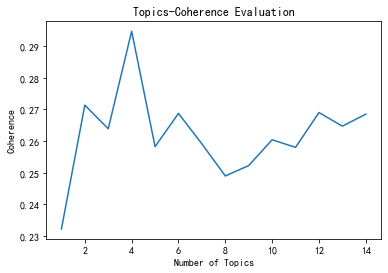

In [17]:
x = range(1,15)

y = [coherence(i) for i in x]
plt.plot(x, y)
plt.xlabel('Number of Topics')
plt.ylabel('Coherence')
plt.rcParams['font.sans-serif']=['SimHei']
matplotlib.rcParams['axes.unicode_minus']=False
plt.title('Topics-Coherence Evaluation')
plt.show()

In [18]:
# Train LDA model.

# Set training parameters.
num_topics = 4
chunksize = 2000
passes = 20
iterations = 400
eval_every = None  # Don't evaluate model perplexity, takes too much time.

# Make a index to word dictionary.
temp = dictionary[0]  # This is only to "load" the dictionary.
id2word = dictionary.id2token


model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    chunksize=chunksize,
    alpha='auto',
    eta='auto',
    iterations=iterations,
    num_topics=num_topics,
    passes=passes,
    eval_every=eval_every
)

top_topics = model.top_topics(corpus) #, num_words=20)

2022-09-30 14:37:19,814 : INFO : using autotuned alpha, starting with [0.25, 0.25, 0.25, 0.25]
2022-09-30 14:37:19,814 : INFO : using serial LDA version on this node
2022-09-30 14:37:19,814 : INFO : running online (multi-pass) LDA training, 4 topics, 20 passes over the supplied corpus of 83 documents, updating model once every 83 documents, evaluating perplexity every 0 documents, iterating 400x with a convergence threshold of 0.001000
2022-09-30 14:37:19,819 : INFO : PROGRESS: pass 0, at document #83/83
2022-09-30 14:37:19,867 : INFO : optimized alpha [0.10812022, 0.16389826, 0.19950056, 0.14223443]
2022-09-30 14:37:19,867 : INFO : topic #0 (0.108): 0.071*"nike" + 0.070*"refund" + 0.063*"shoe" + 0.046*"order" + 0.046*"still" + 0.045*"would" + 0.045*"back" + 0.045*"get" + 0.042*"waiting" + 0.037*"pair"
2022-09-30 14:37:19,867 : INFO : topic #1 (0.164): 0.120*"nike" + 0.067*"order" + 0.044*"online" + 0.039*"get" + 0.037*"shoe" + 0.037*"email" + 0.033*"item" + 0.031*"sent" + 0.031*"time"

2022-09-30 14:37:20,048 : INFO : topic #0 (0.073): 0.104*"nike" + 0.103*"shoe" + 0.088*"refund" + 0.086*"get" + 0.051*"time" + 0.051*"would" + 0.051*"waiting" + 0.042*"still" + 0.042*"month" + 0.033*"bought"
2022-09-30 14:37:20,049 : INFO : topic #1 (0.090): 0.098*"nike" + 0.070*"order" + 0.058*"online" + 0.047*"dont" + 0.043*"item" + 0.038*"got" + 0.038*"email" + 0.037*"sent" + 0.034*"say" + 0.034*"call"
2022-09-30 14:37:20,049 : INFO : topic #2 (0.126): 0.130*"nike" + 0.077*"order" + 0.074*"customer" + 0.056*"shoe" + 0.055*"service" + 0.049*"customer_service" + 0.041*"one" + 0.041*"product" + 0.031*"buy" + 0.027*"return"
2022-09-30 14:37:20,050 : INFO : topic #3 (0.085): 0.103*"order" + 0.068*"customer" + 0.056*"service" + 0.053*"time" + 0.053*"never" + 0.044*"email" + 0.042*"ordered" + 0.041*"customer_service" + 0.039*"company" + 0.034*"would"
2022-09-30 14:37:20,050 : INFO : topic diff=0.058222, rho=0.333333
2022-09-30 14:37:20,052 : INFO : PROGRESS: pass 8, at document #83/83
2022

2022-09-30 14:37:20,175 : INFO : topic #3 (0.070): 0.099*"order" + 0.071*"customer" + 0.059*"service" + 0.056*"never" + 0.055*"time" + 0.045*"email" + 0.042*"customer_service" + 0.042*"company" + 0.041*"ordered" + 0.036*"would"
2022-09-30 14:37:20,186 : INFO : topic diff=0.026917, rho=0.250000
2022-09-30 14:37:20,186 : INFO : PROGRESS: pass 15, at document #83/83
2022-09-30 14:37:20,190 : INFO : optimized alpha [0.062066495, 0.07408026, 0.10338285, 0.06830438]
2022-09-30 14:37:20,190 : INFO : topic #0 (0.062): 0.113*"nike" + 0.111*"shoe" + 0.090*"refund" + 0.089*"get" + 0.052*"waiting" + 0.052*"would" + 0.052*"time" + 0.042*"still" + 0.039*"worst" + 0.038*"month"
2022-09-30 14:37:20,190 : INFO : topic #1 (0.074): 0.093*"nike" + 0.074*"order" + 0.065*"online" + 0.047*"dont" + 0.040*"item" + 0.036*"email" + 0.036*"got" + 0.035*"sent" + 0.033*"get" + 0.033*"say"
2022-09-30 14:37:20,190 : INFO : topic #2 (0.103): 0.133*"nike" + 0.079*"customer" + 0.078*"order" + 0.061*"shoe" + 0.058*"servi

In [19]:
avg_topic_coherence = sum([t[1] for t in top_topics]) / num_topics
print('Average topic coherence: %.4f.' % avg_topic_coherence)

Average topic coherence: -1.5122.


In [20]:
from pprint import pprint
pprint(top_topics)

[([(0.09870856, 'order'),
   (0.07188629, 'customer'),
   (0.059211526, 'service'),
   (0.056765646, 'never'),
   (0.055875026, 'time'),
   (0.045422193, 'email'),
   (0.042711, 'company'),
   (0.042613335, 'customer_service'),
   (0.041016094, 'ordered'),
   (0.036014188, 'would'),
   (0.031396374, 'call'),
   (0.030531779, 'money'),
   (0.03037378, 'even'),
   (0.027999988, 'stock'),
   (0.027550558, 'nike'),
   (0.026362244, 'got'),
   (0.025714613, 'told'),
   (0.025047733, 'day'),
   (0.018638473, 'get'),
   (0.017997986, 'still')],
  -1.1592380529794963),
 ([(0.089958645, 'nike'),
   (0.07621857, 'order'),
   (0.067726746, 'online'),
   (0.04602485, 'dont'),
   (0.03827549, 'item'),
   (0.034296725, 'email'),
   (0.034191046, 'got'),
   (0.03380043, 'get'),
   (0.03334765, 'sent'),
   (0.031536646, 'still'),
   (0.031448778, 'say'),
   (0.031356413, 'call'),
   (0.0311727, 'week'),
   (0.031120416, 'refund'),
   (0.028931923, 'even'),
   (0.028901523, 'time'),
   (0.026676005, 'm

In [21]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
vis =  gensimvis.prepare(model, corpus, dictionary=dictionary)
vis

C:\Users\Wu\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.049387 -0.093639       1        1  31.265307
1     -0.020565  0.098862       2        1  28.279472
3     -0.094253  0.006708       3        1  27.742868
0      0.164206 -0.011931       4        1  12.712353, topic_info=        Term        Freq       Total Category  logprob  loglift
18      shoe   44.000000   44.000000  Default  30.0000  30.0000
2     refund   25.000000   25.000000  Default  29.0000  29.0000
29  customer   55.000000   55.000000  Default  28.0000  28.0000
13       get   33.000000   33.000000  Default  27.0000  27.0000
1       nike  107.000000  107.000000  Default  26.0000  26.0000
..       ...         ...         ...      ...      ...      ...
22     stock    0.241994   17.481517   Topic4  -6.4405  -2.2174
28      call    0.293230   23.530872   Topic4  -6.2484  -2.3225
31      week    0.250761   19.600839   Topic4  -6.4049  -2.2962
38     never    0.280102   29.906530   Topic4  -6.2942  -2.6081
19   service    0.271788   48.842064   Topic4  -6.3244  -3.1287

[161 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
32        1  0.343709  anything
32        2  0.412451  anything
32        3  0.137484  anything
32        4  0.068742  anything
26        1  0.346071      back
...     ...       ...       ...
25        3  0.325220     worst
25        4  0.390263     worst
4         1  0.202461     would
4         3  0.485907     would
4         4  0.323938     would

[143 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 4, 1])